# 파이썬 머신러닝 스터디
## [파이썬 완벽가이드 5단원_회귀]

### 01. 회귀 소개

회귀 분석은 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법. 머신러닝 회귀 예측
의 핵심은 주어진 피처와 결정 값 데이터 기반에서 학습을 통해 최적의 회귀 계수를 찾아내는 것.

회귀는 회귀 계수의 선형/비선형 여부. 독립변수의 개수, 종속변수의 개수에 따라 여러 가지 유형으로
나눌 수 있다. 회귀에서 가장 중요한 것은 바로 회귀 계수입니다. 이 회귀 계수가 선형이나 아니냐에 따라 선형 회귀와 비선형 회귀로 나눌 수 있다. 그리고 독립변수의 개수가 한 개인지 여러 개인지에 따라 단일 회귀, 다중 회귀로 나뉜다.

지도학습은 두 가지 유형으로 나뉘는데, 바로 분류와 회귀다. 이 두 가지 기법의 가장 큰 차이는 
* 분류는 예측값이 카테고리와 같은 이산형 클래스 값이고 
* 회귀는 연속형 숫자 값이라는 것이다.

여러 가지 회귀 중에서 선형 회귀가 가장 많이 사용된다. 선형 회귀는 실제 값과 예측값의 차이(오류의 제곱 값)를 최소화하는 직선형 회귀선을 최적화하는 방식. 선형 회귀 모델은 규제
(Regularization) 방법에 따라 다시 별도의 유형으로 나뉠 수 있다. 규제는 일반적인 선형 회귀의
과적합 문제를 해결하기 위해서 회귀 계수에 페널티 값을 적용하는 것.

* 대표적인 선형 회귀 모델
> * 일반 선형 회귀: 예측값과 실제 값의 RSS(Residual Sum of Squares)를 최소화할 수 있도록 회귀 계수를 최적화하며, 규제(Reg니arization)를 적용하지 않은 모델입니다.
> * 릿지(Ridge)： 릿지 회귀는 선형 회귀에 L2 규제를 추가한 회귀 모델입니다. 릿지 회귀는 L2 규제를 적용하는데, L2 규제
는 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해서 회귀 계수값을 더 작게 만드는 규제 모델입니다.
> * 라쏘(Lasso)： 라쏘 회귀는 선형 회귀에 L1 규제를 적용한 방식입니다. L2 규제가 회귀 계수 값의 크기를 줄이는 데 반해  L1 규제는 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않게 하는 것입니다. 이러
한 특성 때문에 L1 규제는 피처 선택 기능으로도 불립니다.
> * 엘라스틱넷(ElasticNet)： L2, L1 규제를 함께 결합한 모델입니다. 주로 피처가 많은 데이터 세트에서 적용되며. L1 규제로 피처의 개수를 줄임과 동시에 L2 규제로 계수 값의 크기를 조정합니다.
> * 로지스틱 회귀(Logistic Regression)： 로지스틱 회귀는 회귀라는 이름이 붙어 있지만, 사실은 분류에 사용되는 선형 모델입니다. 로지스틱 회귀는 매우 강력한 분류 알고리즘입니다. 일반적으로 이진 분류뿐만 아니라 희소 영역의 분류. 예를 들어 텍스트 분류와 같은 영역에서 뛰어난 예측 성능을 보입니다


### 02. 단순 선형 회귀를 통한 회귀 이해

단순 선형 회귀는 독립변수도 하나, 종속변수도 하나인 선형 회귀
실제 값과 회귀 모델의 차이에 따른 오류 값을 남은 오류, 즉 잔차라고 부른다. 최적의 회귀
모델을 만든다는 것은 바로 전체 데이터의 잔차（오류 값） 합이 최소가 되는 모델을 만든다는 의미다. 동시에 오류 값 합이 최소가 될 수 있는 최적의 회귀 계수를 찾는다는 의미도 된다.

오류 값은 十나 -가 될 수 있다. 그래서 전체 데이터의 오류 합을 구하기 위해 단순히 더했다가는 뜻하지 않게 오류 합이 크게 줄어들 수 있습니다. 따라서 보통 오류 합을 계산할 때는
* 절댓값을 취해서 더하거나（Mean Absolute Error）, 
* 오류 값의 제곱을 구해서 더하는 방식（RSS, Residual Sum of Square）을 취함. 
> 일반적으로 미분 등의 계산을 편리하게 하기 위해서 RSS（Residiial Sum of Square） 방식으로 오류 합을 구한다. 즉. $Error^2 = RSS$입니다.

RSS는 이제 변수가 $w_{0}, w_{1}$인 식으로 표현할 수 있으며, 이 RSS를 최소로 하는 $w_{0}, w_{1}$, 즉 회귀 계수를 학
습을 통해서 찾는 것이 머신러닝 기반 회귀의 핵심 사항이다. RSS는 회귀식의 독립변수 X, 종속변수
Y가 중심 변수가 아니라 w 변수（회귀 계수）가 중심 변수임을 인지하는 것이 매우 중요합니다（학습 데이터로 입력되는 독립변수와 종속변수는 RSS에서 모두 상수로 간주합니다）. 일반적으로 RSS는 학습
데이터의 건수로 나누어서 다음과 같이 정규화된 식으로 표현된다.

$RSS(w_{0}, w_{1}) = \frac{1}{N} \sum_{i=1}^{N}(y_{i}-(w_{0}+ w_{1}*x_{i}))^2$
<br>

회귀에서 이 RSS는 비용(Cost）이며 w 변수（회귀 계수）로 구성되는 RSS를 비용 함수라고 합니다. 머신러닝 회귀 알고리즘은 데이터를 계속 학습하면서 이 비용 함수가 반환하는 값（즉, 오류 값）을 지속해서
감소시키고 최종적으로는 더 이상 감소하지 않는 최소의 오류 값을 구하는 것입니다. 비용 함수를 손실함수（loss function） 라고도 합니다.


### 03. 비용 최소화하기 - 경사 하강법（Gradient Descent） 소개

W 파라미터의 개수가 적
다면 고차원 방정식으로 비용 함수가 최소가 되는 W 변숫값을 도출할 수 있겠지만, W 파라미터가 많으면 고차원 방정식을 동원하더라도 해결하기가 어렵다. 경사 하강법은 이러한 고차원 방정식에
대한 문제를 해결해 주면서 비용 함수 RSS를 최소화하는 방법을 직관적으로 제공하는 뛰어난 방식이다. 경사 하강법의 사전적 의미인 ‘점진적인 하강’이라는 뜻에서도 알
수 있듯이,‘점진적으로’ 반복적인 계산을 통해 W 파라미터 값을 업데이트하면서 오류 값이 최소가 되는 w 파라미 터를 구하는 방식 입니다.

경사 하강법은 반복적으로 비용 함수의 반환 값, 즉 예측값과 실제 값의 차이가 작아지는 방향성을 가지고 W 파라미터를 지속해서 보정해 나간다. 최초 오류 값이 100이었다면 두 번째 오류 값은 100보다 작은 90, 세 번째는 80과 같은 방식으로 지속해서 오류를 감소시키는 방향으로 W 값을 계속 업데이트해 나간다. 그리고 오류 값이 더 이상 작아지 지 않으면 그 오류 값을 최소 비용으로 판단하고 그때의 W 값을 최적 파라미터로 반환한다.

속도와 같은 포물선 형태의 2차 함수의 최저점은 해당 2차 함수의 미분 값인 1 차 함수의 기울기가 가장
최소일 때다. 예를 들어 비용 함수가 다음 그림과 같은 포물선 형태의 2차 함수라면 경사 하강법은
최초 w에서부터 미분을 적용한 뒤 이 미분 값이 계속 감소하는 방향으로 순차적으로 w를 업데이트한다. 마침내 더 이상 미분된 1차 함수의 기울기가 감소하지 않는 지점을 비용 함수가 최소인 지점으로 간주하고 그때의 w를 반환.
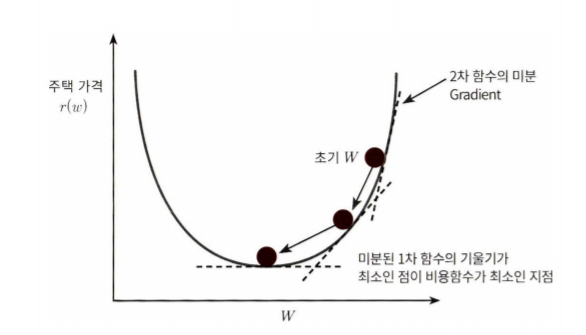

앞에서 언급한 비용 함수 $RSS(w_{0}, w_{1})$를 편의상 $R(w)$로 지칭하겠다. $R(w)$는 변수가 w 파라미터
로 이뤄진함수이며. <br>
$R(w) = \frac{1}{N} \sum_{i=1}^{N}(y_{i}-(w_{0}+ w_{1}*x_{i}))^2$이다. $R(w)$를 미분해서 미분함수의 최솟
값을 구해야 하는데, $R(w)$는 두 개의 w 파라미터인 $w_{0}, w_{1}$을 각각 가지고 있기 때문에 일반적인 미
분을 적용할 수가 없고. $w_{0}, w_{1}$ 각 변수에 편미분을 적용해야 합니다. $R(w)$를 최소화하는 $w_{0}, w_{1}$의 값
은 각각 $r(w)$를 $w_{0}, w_{1}$으로 순차적으로 편미분을 수행해 얻을 수 있습니다.
$R(w)$를 $w_{0}, w_{1}$으로 편미분한 결과는 다음과 같습니다.<br>
$ \frac{\partial R(w)}{\partial w_{1}} = \frac{2}{N} \sum_{i=1}^{N} -x_{i}*(y_{i}-(w_{0}+ w_{1}*x_{i})) = -\frac{2}{N} \sum_{i=1}^{N} x_{i}*(실제값_{i}-예측값_{i})$ = a<br>
$ \frac{\partial R(w)}{\partial w_{0}} = \frac{2}{N} \sum_{i=1}^{N}-(y_{i}-(w_{0}+ w_{1}*x_{i})) = -\frac{2}{N}\sum_{i=1}^{N}(실제값_{i}-예측값_{i})$ = b

$w_{0}, w_{1}$의 편미분 결괏값인 a,b를  반복적으로 보정하면서 $w_{0}, w_{1}$값을 업데이트하면 비용 함수 $R(W)$가 최소가 되는 $w_{0}, w_{1}$의 값을 구할 수 있습
니다. 업데이트는 새로운 $w_{1}$을 이전 $w_{1}$에서 편미분 결괏값을 마이너스(-)하면서 적용합니다. 즉 새로
운 $w_{1} = 이전 w_{1} - ( -\frac{2}{N} \sum_{i=1}^{N} x_{i}*(실제값_{i}-예측값_{i}))$입니다. 위 편미분 값이 너무 클수 있기 때문에
보정 계수 $\eta$를 곱하는데. 이를 ‘학습률’이라고 합니다. 요약하자면, 경사 하강법은 $새로운 w_{1} = 이전w_{1} +\eta \frac{2}{N} \sum_{i=1}^{N} x_{i}*(실제값_{i}-예측값_{i})$, $새로운 w_{0} = 이전w_{0} +\eta \frac{2}{N} \sum_{i=1}^{N} (실제값_{i}-예측값_{i})$ 을 반복적으로 적용하면서 비용 함수가 최소가 되는 값을 찾는다.
* 경사 하강법의 일반적인 프로세스
> * step 1：$w_{0}, w_{1}$를 임의의 값으로 설정하고 첫 비용 함수의 값을 계산합니다.
> * Step 2 :  $w_{1}을 w_{1} +\eta \frac{2}{N} \sum_{i=1}^{N} x_{i}*(실제값_{i}-예측값_{i})$, $w_{0}을 w_{0} +\eta \frac{2}{N} \sum_{i=1}^{N} (실제값_{i}-예측값_{i})$으로 업데이트한 후 다시 비용 함수의 값을 계산합니다.
> * Step 3： 비용 함수의 값이 감소했으면 다시 Step 2를 반복합니다. 더 이상 비용 함수의 값이 감소하지 않으면 그때의
를 구하고 반복을 중지합니다.


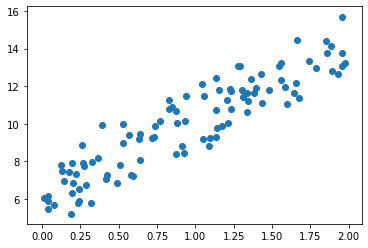

In [1]:
# 실제값을 Y=4X+6 시뮬레이션하는 데이터 값 생성
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4X + 6 식을 근사(w1=4, w0=6). random 값은 Noise를 위해 만듬
X = 2 * np.random.rand(100,1)
y = 6 +4 * X+ np.random.randn(100,1)

# X, y 데이터 셋 scatter plot으로 시각화
plt.scatter(X, y)

In [2]:
X.shape, y.shape

((100, 1), (100, 1))

**w0과 w1의 값을 최소화 할 수 있도록 업데이트 수행하는 함수 생성.**

* 예측 배열 y_pred는 np.dot(X, w1.T) + w0 임 100개의 데이터 X(1,2,...,100)이 있다면 예측값은 w0 + X(1)w1 + X(2)w1 +..+ X(100)*w1이며, 이는 입력 배열 X와 w1 배열의 내적임.
* 새로운 w1과 w0를 update함

In [3]:
# w1 과 w0 를 업데이트 할 w1_update, w0_update를 반환. 
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y-y_pred
         
    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성 
    w0_factors = np.ones((N,1))

    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))    
    
    return w1_update, w0_update

In [4]:

w0 = np.zeros((1,1))
w1 = np.zeros((1,1))
y_pred = np.dot(X, w1.T) + w0
diff = y-y_pred
print(diff.shape)
w0_factors = np.ones((100,1))
w1_update = -(2/100)*0.01*(np.dot(X.T, diff))
w0_update = -(2/100)*0.01*(np.dot(w0_factors.T, diff))   
print(w1_update.shape, w0_update.shape)
w1, w0

(100, 1)
(1, 1) (1, 1)


(array([[0.]]), array([[0.]]))

**반복적으로 경사 하강법을 이용하여 get_weigth_updates()를 호출하여 w1과 w0를 업데이트 하는 함수 생성**

In [5]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함. 
def gradient_descent_steps(X, y, iters=10000):
    # w0와 w1을 모두 0으로 초기화. 
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출하여 w1, w0 업데이트 수행. 
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
              
    return w1, w0

**예측 오차 비용을 계산을 수행하는 함수 생성 및 경사 하강법 수행**

In [6]:
def get_cost(y, y_pred):
    N = len(y) 
    cost = np.sum(np.square(y - y_pred))/N
    return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


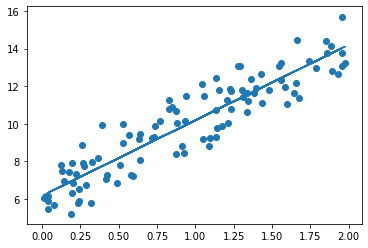

In [7]:
plt.scatter(X, y)
plt.plot(X,y_pred)

**미니 배치 확률적 경사 하강법을 이용한 최적 비용함수 도출**

In [8]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index =0
    
    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터 추출하여 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0

In [9]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:",round(w1[0,0],3),"w0:",round(w0[0,0],3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937


=> (미니 배치) 확률적 경사 하강법으로 구한 wO, wl 결과는 경사 하강법으로 구한 wl, wO와 큰 차이가
없으며, 예측 오류 비용 또한 0.9937로 경사 하강법으로 구한 예측 오류 비용 0.9935보다 아주 조금
높을 뿐으로 큰 예측 성능상의 차이가 없음을 알 수 있습니다. 따라서 큰 데이터를 처리할 경우에는 경
사 하강법은 매우 시간이 오래 걸리므로 일반적으로 확률적 경사 하강법을 이용합니다

피처가 여러 개인 경우도
1 개인 경우를 확장해 유사하게 도출할 수 있다. 피처가 한 개인 경우의 예측값 $\hat{Y} = w_{0}+ w_{1}*X$로 회귀 계수를 도출한다. 피처가 M개$(X_{1}, X_{2}, ... ,X_{100})$ 있다면 그에 따른 회귀 계수도 M + 1(1개는
$w_{0}$)개로 도출됩니다. <br>
즉, $\hat{Y} = w_{0}+ w_{1}*X_{1}+ w_{2}*X_{2}+ ... + w_{100}*X_{100}$0과 같이 예측 회귀식을 만들 수 있다. 이렇게 회귀 계수가 많아지더라도 선형대수를 이용해 간단하게 예측값을 도출할 수 있다.
-> $\hat{Y} = np.dot(X_{mat}.W^{T})$
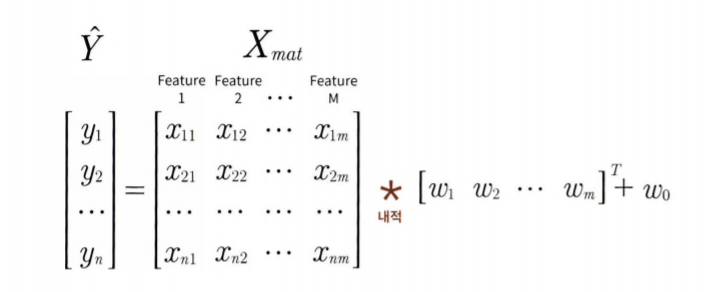
w0를 Weight의 배열인 W안에 포함시키기 위해서 Xmat의 맨 처음 열에 모든 데이터의 값이 1 인 피처
Feat 0을 추가하겠습니다. 이제 회귀 예측값은 $\hat{Y} = X_{mat}*W^{T}$와 같이 도출할 수 있습니다.
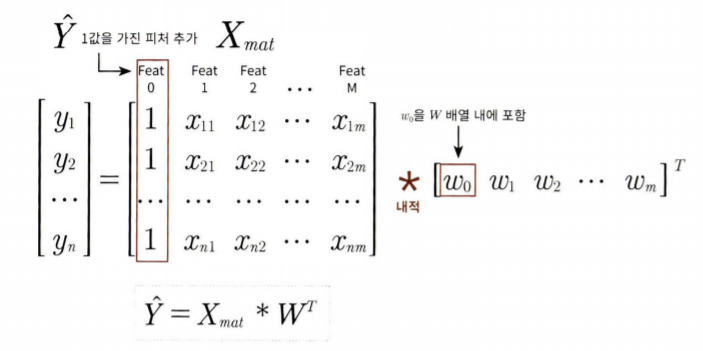

### 04. 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측

***LinearRegression 클래스 一 Ordinary Least Squares***

LinearRegression 클래스는 예측값과 실제 값의 RSS(Residual Sum of Squares)를 최소화해
OLS(Ordinary Least Squares) 추정 방식으로 구현한 클래스입니다. LinearRegression 클래스는
fit() 메서드로 X, y 배열을 입력 받으면 회귀 계수(Coefficients)인 W를 coef_ 속성에 저장한다.<br>
```class sklearn.linear_model.LinearRegression(fit_intercept=True, normaiize=FaIse, copy_X=True,
n_jobs=1)```
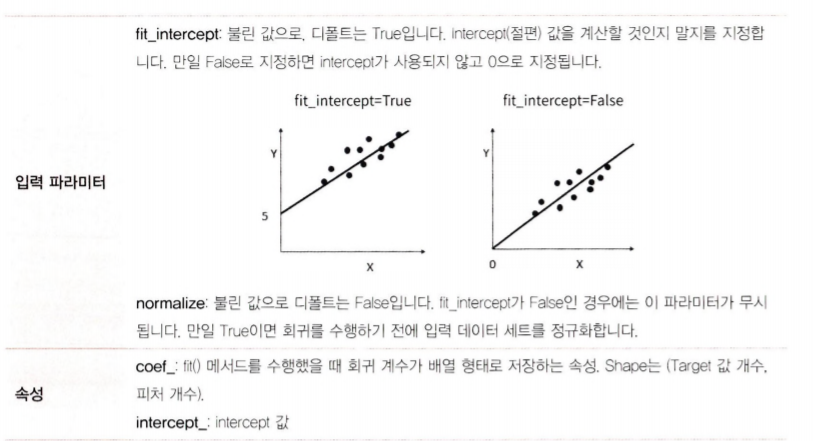

Ordinary Least Squares 기반의 회귀 계수 계산은 입력 피처의 독립성에 많은 영향을 받는다. 피처간의 상관관계가 매우 높은 경우 분산이 매우 커져서 오류에 매우 민감해진다. 이러한 현상을 다중
공선성(multi-collinearity) 문제. 일반적으로 상관관계가 높은 피처가 많은 경우 독립적인 중요한 피처만 남기고 제거하거나 규제를 적용한다. 또한 매우 많은 피처가 다중 공선성 문제를 가지고 있다면 PCA를 통해 차원 축소를 수행하는 것도 고려해 볼 수 있다.


***회귀 평가 지표***

회귀의 평가를 위한 지표는 실제 값과 회귀 예측값의 차이 값을 기반으로 한 지표가 중심이다. 실제값과 예측값의 차이를 그냥 더하면 +와 -가 섞여서 오류가 상쇄된다(데이터 두 개의 예측 차이가 하나는 -3. 다른 하나는 +3일 경우 단순히 더하면 오류가 0으로 나타나기 때문에 정확한 지표가 될 수 없다). 이 때문에 오류의 절댓값 평균이나 제곱, 또는 제곱한 뒤 다시 루트를 씌운 평균값을 구한다.
* 일반적으로 회귀의 성능을 평가하는 지표
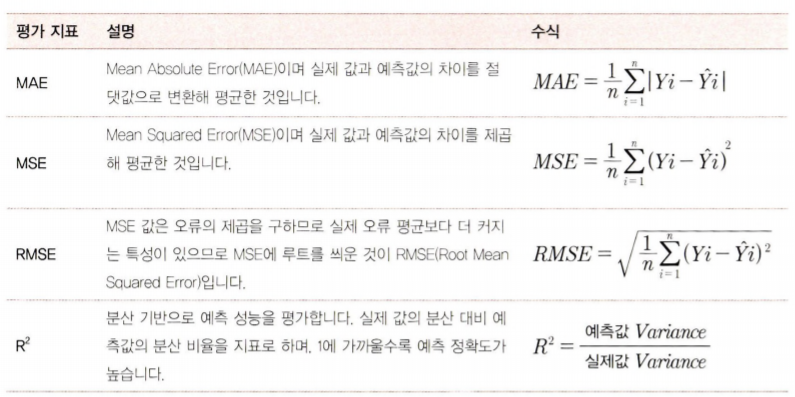
이 밖에 MSE나 RMSE에 로그를 적용한 MSLE(Mean Squared Log Error)와 RMSLE(Root Mean
Squared Log Error)도 사용 // But 사이킷런은 아쉽게도 RMSE를 제공하지 않음. RMSE를 구하기 위해서는 MSE에 제곱근을 씌워서
계산하는 함수를 직접 만들어야 함.

* 각 평가 방법에 대한 사이킷런의 API 및 cross_val_
score나 GridSearchCV에서 평가 시 사용되는 scoring 파라미터의 적용 값
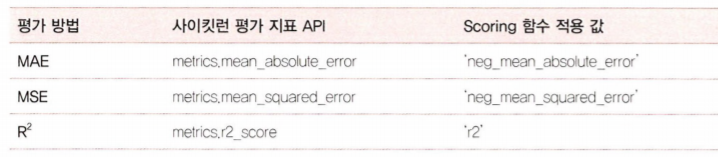
*cross_val_score, GridSearchCV와 같은 Scoring 함수에 회귀 평가 지표를 적용할 때 한 가지 유의할 점이 있습니다. 예를 들어, MAE의 scoring 파라미터 값을 살펴보면 ‘neg_mean_absolute_em)r’와 같이 ‘neg_라는 접두어가 붙어 있습니다. 이는 Negative(음수) 값을 가진다는 의미인데, MAE는
절댓값의 합이기 때문에 음수가 될 수 없습니다. Scoring 함수에 ‘neg_mean_absolute_error’를 적용해 음수값을 반환하는 이유는 사이킷런의 Scoring 함수가 score값이 클수록 좋은 평가 결과로 자동 평가하기 때문입니다(특히 GridSearchCV의 경우 가장 좋은 Evaluation 값을 가지는 하이퍼 파라미터로 Estimator를 학습까지 자동으로 시킬 수 있습니다). 그런데 실제 값과 예측값의 오류 차이를 기반으로 하는 회귀 평가 지표의 경우 값이 커지면 오히려 나쁜 모델이라는 의미이므로 이를 사이킷런의
Scoring 함수에 일반적으로 반영하려면 보정이 필요합니다.
<br>따라서 -1을 원래의 평가 지표 값에 곱해서 음수(Negative)를 만들어 작은 오류 값이 더 큰 숫자
로 인식하게 합니다. 예를 들어 10 > 1이지만 음수를 곱하면 -1 > -10이 됩니다. metrics.mean_
absoli.te_error( )와 같은 사이킷런 평가 지표 API는 정상적으로 양수의 값을 반환합니다. 하지만
Scoring 함수의 scoring 파라미터 값 ‘neg_mcan_absoliite_error’가 의미하는 것은 -1 * metrics.
mean_absoliite_em)r()이니 주의가 필요합니다.*


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

# boston 데이타셋 로드
boston = load_boston()

# boston 데이타셋 DataFrame 변환 
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함. 
bostonDF['PRICE'] = boston.target
print('Boston 데이타셋 크기 :',bostonDF.shape)
bostonDF.head()

Boston 데이타셋 크기 : (506, 14)


CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

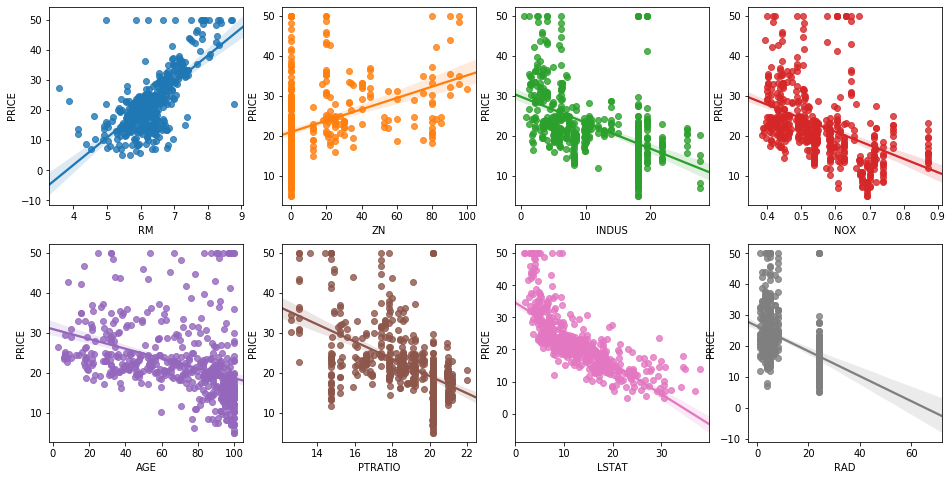

In [11]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='PRICE',data=bostonDF , ax=axs[row][col])

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

# Linear Regression OLS로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train ,y_train )
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297 , RMSE : 4.159
Variance score : 0.757


In [13]:
print('절편 값:',lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: 40.995595172164336
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [14]:
# # 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. index가 컬럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns )
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [15]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)
lr = LinearRegression()

# cross_val_score( )로 5 Fold 셋으로 MSE 를 구한 뒤 이를 기반으로 다시  RMSE 구함. 
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수 
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds 의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
 5 folds 의 평균 RMSE : 5.829 


### 05. 다항 회귀와 과(대)적합/과소적합 이해

***다항 회귀이해***<br>
회귀가 독립변수의 단항식이 아닌 2차, 3차 방정식과 같은 다항식으로 표현되는 것을 다항(Polynomial) 회귀라고 한다. 한 가지 주의할 것은 다항 회귀를 비선형 회귀로 혼동하기 쉽지만, 다항 회귀는 선형 회귀라는 점이다. 회귀에서 선형 회귀/비선형 회귀를 나누는 기준은 회귀 계수가 선형/비선형인지에 따른 것이지 독
립변수의 선형/비선형 여부와는 무관히다.
    식$y =  w_{0}+w_{1}*x_{1}+w_{2}*x_{2}+w_{3}*x_{1}*x_{2}+w_{4}*x_{1}^{2}+w_{5}*x_{2}^{2}$은 새로운 변수인 Z를 $z=[x_{1},x_{2},x_{1}*x_{2},x_{1}^{2},x_{2}^{2}]$로 한다면여전히 선형 회귀!
    
데이터 세트에 대해서 피처 X에 대해 Target Y 값의 관계를 단순 선형 회귀 직선형으로 표현한 것보다 다항 회귀 곡선형으로 표현한 것이 더 예측 성능이 높다.

아쉽지만 사이킷런은 다항 회귀를 위한 클래스를 명시적으로 제공하지 않는다. 대신 다항 회귀 역시 선형 회귀이기 때문에 비선형 함수를 선형 모델에 적용시키는 방법을 사용해 구현한다. 이를 위해 사이킷런은 PolynomialFeatures 클래스를 통해 피처를 Polynomial(다항식) 피처로 변환함. PolynomialFeatures 클래스는 degree 파라미터를 통해 입력 받은 단항식 피처를 degree에 해당하는 다항식 피처로 변환한다. 다른 전처리 변환클래스와 마찬가지로 PolynomialFeatures 클래스는 fit(),
transform() 메서드를 통해 이 같은 변환 작업을 수행한다.

In [16]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1],[2,3]]의 2X2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n',X )

# degree = 2 인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용하여 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 feature:\n', poly_ftr)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 feature:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


**3차 다항식 결정값을 구하는 함수 polynomial_func(X) 생성. 즉 회귀식은 결정값 y = 1+ 2x_1 + 3x_1^2 + 4x_2^3**

In [17]:
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    print(X[:, 0])
    print(X[:, 1])
    return y

X = np.arange(0,4).reshape(2,2)

print('일차 단항식 계수 feature: \n' ,X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
[0 2]
[1 3]
삼차 다항식 결정값: 
 [  5 125]


In [18]:
#  3차 다항식 계수의 피처값과 3차 다항식 결정값으로 학습

# 3 차 다항식 변환 
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n',poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀 계수\n' , np.round(model.coef_, 2))
print('Polynomial 회귀 Shape :', model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape : (10,)


**사이킷런 파이프라인(Pipeline)을 이용하여 3차 다항회귀 학습**

사이킷런의 Pipeline 객체는 Feature 엔지니어링 변환과 모델 학습/예측을 순차적으로 결합해줍니다.

In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3 
    return y

# Pipeline 객체로 Streamline 하게 Polynomial Feature변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)
print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


In [20]:
## 다항 회귀를 이용한 보스턴 주택가격 예측

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

# boston 데이타셋 로드
boston = load_boston()

# boston 데이타셋 DataFrame 변환 
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함. 
bostonDF['PRICE'] = boston.target
print('Boston 데이타셋 크기 :',bostonDF.shape)

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)


X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

## Pipeline을 이용하여 PolynomialFeatures 변환과 LinearRegression 적용을 순차적으로 결합. 
p_model = Pipeline([('poly', PolynomialFeatures(degree=3, include_bias=False)),
                  ('linear', LinearRegression())])

p_model.fit(X_train, y_train)
y_preds = p_model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)


print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

Boston 데이타셋 크기 : (506, 14)
MSE : 79625.594 , RMSE : 282.180
Variance score : -1116.598


In [22]:

X_train_poly= PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_train, y_train)
X_train_poly.shape, X_train.shape

((354, 104), (354, 13))

***다항 회귀를 이용한 과소적합 및 과적합 이해// Polynomial Regression 을 이용한 Underfitting, Overfitting 이해***

다항 회귀는 피처의 직선적 관계가 아닌 복잡한 다항 관계를 모델링할 수 있다. 다항식의 차수가
높아질수록 매우 복잡한 피처 간의 관계까지 모델링이 가능하다. 하지만 다항 회귀의 차수(degree)를 높일수록 학습 데이터에만 너무 맞춘 학습이 이뤄져서 정작 테스트 데이터 환경에서는 오히려 예측정확도가 떨어진다. 즉, 차수가 높아질수록 과적합의 문제가 크게 발생.

In [23]:
## cosine 곡선에 약간의 Noise 변동값을 더하여 실제값 곡선을 만듬

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# random 값으로 구성된 X값에 대해 Cosine 변환값을 반환. 
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X는 0 부터 1까지 30개의 random 값을 순서대로 sampling 한 데이타 입니다.  
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 cosine 기반의 true_fun() 에서 약간의 Noise 변동값을 더한 값입니다. 
y = true_fun(X) + np.random.randn(n_samples) * 0.1

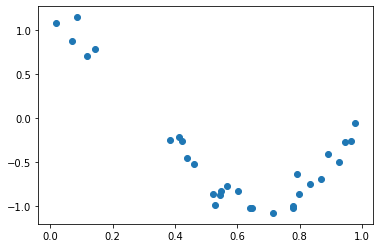

In [24]:
plt.scatter(X, y)


Degree 1 회귀 계수는 [-2.] 입니다.
Degree 1 MSE 는 0.41 입니다.

Degree 4 회귀 계수는 [  0. -18.  24.  -7.] 입니다.
Degree 4 MSE 는 0.04 입니다.

Degree 15 회귀 계수는 [-2.98300000e+03  1.03900000e+05 -1.87417100e+06  2.03717220e+07
 -1.44873987e+08  7.09318780e+08 -2.47066977e+09  6.24564048e+09
 -1.15677067e+10  1.56895696e+10 -1.54006776e+10  1.06457788e+10
 -4.91379977e+09  1.35920330e+09 -1.70381654e+08] 입니다.
Degree 15 MSE 는 182815433.48 입니다.


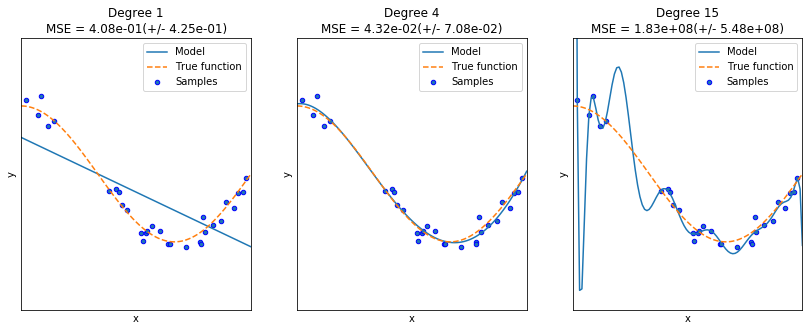

In [25]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다. 
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    # 개별 degree별로 Polynomial 변환합니다. 
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    # 교차 검증으로 다항 회귀를 평가합니다. 
    scores = cross_val_score(pipeline, X.reshape(-1,1), y,scoring="neg_mean_squared_error", cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients),2))
    print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(degrees[i] , -1*np.mean(scores)))
    
    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다. 
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.  
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model") 
        # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()

=> 실선으로 표현된 예측 곡선은 다항 회귀 예측 곡선입니다. 점선으로 표현된 곡선은 실제 데이터 세트
X, Y의 코사인 곡선입니다. 학습 데이터는 0부터 1까지의 30개의 임의의 X 값과 그에 따른 코사인 Y
값에 잡음을 변동 값으로 추가해 구성했으며 MSE(Mean Squared Error) 평가는 학습 데이터를 10개
의 교차 검증 세트로 나누어 측정해서 평균한 것입니다.

* 맨 왼쪽의 Degree 1 예측 곡선은 단순한 직선으로서 단순 선형 회귀와 똑같습니다. 실제 데이터 세트인 코사인 데이터 세트를 직선으로 예측하기에는 너무 단순해 보입니다. 예측 곡선이 학습 데이터의 패턴을 제대로 반영하지 못하고 있는 과소적합 모델이 되었습니다. MSE 값은 약 0.407입니다.
* 가운데 Degree 4 예측 곡선은 실제 데이터 세트와 유사한 모습입니다. 변동하는 잡음까지 예측하자는 못했지만, 학습 데이터 세트를 비교적 잘 반영해 코사인 곡선 기반으로 테스트 데이터를 잘 예측한 곡선을 가진 모델이 되었습니다. MSE 값은 약 0.043으로 가장 뛰어난 예측 성능을 나타내고 있습니다.
* 맨 오른쪽 Degree 15 예측 곡선은 MSE 값이 182815432가 될 정도로 어처구니없는 오류 값이 발생했습니다(물론 과적합을 강조하기 위해 Degree# 매우 높은 차수인 15로 설정한 결과입니다). 예측 곡선을 보면 데이터 세트의 변동 잡음 값까지 지나치게 반영한 결과, 예측 곡선이 학습 데이터 세트만 정확히 예측하고, 테스트 값의 실제 곡선과는 완전히 다른 형태의 예측 곡선이 만들어졌습니다. 결과적으로 학습 데이터에 너무 충실하게 맞춘 과적합이 심한 모델이 되었고 어이없는 수준의 높은 MSE 값이 나왔습니다.

**결국 좋은 예측 모델은 Degree 1과 같이 학습 데이터의 패턴을 지나치게 단순화한 과소적합 모델도
아니고 Degree 15와 같이 모든 학습 데이터의 패턴을 하나하나 감안한 지나치게 복잡한 과적합 모델
도 아닌. 학습 데이터의 패턴을 잘 반영하면서도 복잡하지 않은 균형 잡힌(Balanced) 모델을 의미**

---

***편향-분산 트레이드오프(Bias—Variance Trade off)***

편향-분산 트레이드오프는 머신러닝이 극복해야 할 가장 중요한 이슈 중의 하나. <br>
일반적으로 편향과 분산은 한 쪽이 높으면 한 쪽이 낮아지는 경향이 있다. 즉. 편향이 높으면 분산은 낮아지고（과소적합） 반대로 분산이 높으면 편향이 낮아진다（과적합）. 다음 그림은 편향과 분산의
관계에 따른 전체 오류 값（Total Error）의 변화를 잘 보여준다. 
* 편향이 너무 높으면 전체 오류가 높다. 
* 편향을 점점 낮추면 동시에 분산이 높아지고 전체 오류도 낮아지게 된다. 
* 편향을 낮추고 분산을 높이면서 전체 오류가 가장 낮아지는 ‘골디락스’ 지점을 통과하면서 분산을 지속적으로 높이면 전체오류 값이 오히려 증가하면서 예측 성능이 다시 저하된다.
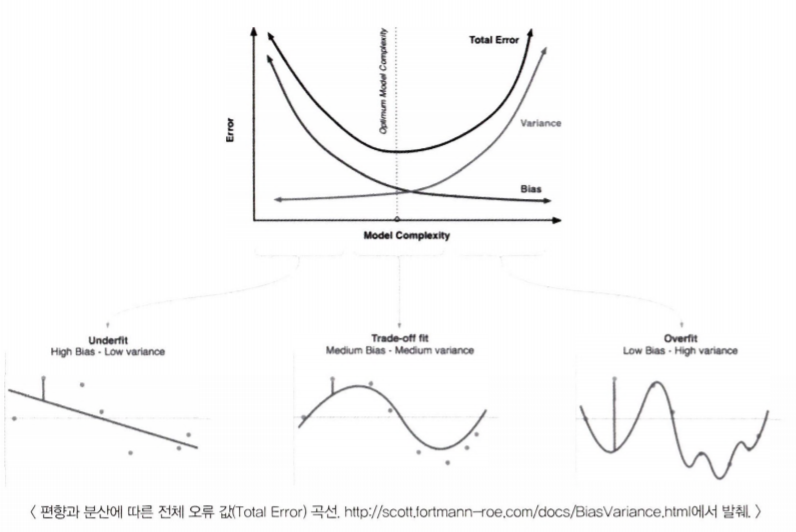

높은 편향/낮은 분산에서 과소적합되기 쉬우며 낮은 편향/높은 분산에서 과적합되기 쉽다. 편향과
분산이 서로 트레이드오프를 이루면서 오류 Cost 값이 최대로 낮아지는 모델을 구축하는 것이 가장 효율적인 머신러닝 예측 모델을 만드는 방법.

### 06. 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷

***규제 선형 모델의 개요***

회귀 모델은 적절히 데이터에 적합하면서도 회귀 계수가 기하급수적으로 커지는 것을 제어할 수 있어야 한다.
이전까지 선형 모델의 비용 함수는 RSS를 최소화하는. 즉 실제 값과 예측값의 차이를 최소화하는 것만
고려했다. 그러다 보니 학습 데이터에 지나치게 맞추게 되고, 회귀 계수가 쉽게 커졌다. 이럴 경우 변동성이 오히려 심해져서 테스트 데이터 세트에서는 예측 성능이 저하되기 쉽다. 이를 반영해 비용 함수는 학습 데이터의 잔차 오류 값을 최소로 하는 RSS 최소화 방법과 과적합을 방지하기 위해
회귀 계수 값이 커지지 않도록 하는 방법이 서로 균형을 이뤄야 한다.
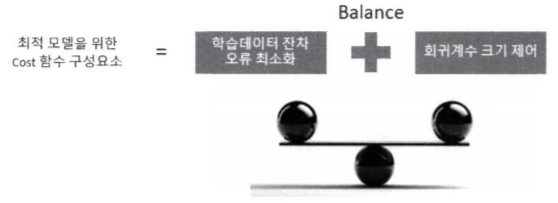
이렇게 회귀 계수의 크기를 제어해 과적합을 개선하려면 비용(Cost) 함수의 목표가 다음과 같이
$RSS(W)十 alpha * \parallel W\parallel$를 최소화하는 것으로 변경될 수 있다.
> $비용 함수 목표 = Min(RSS(W)十 alpha * \parallel W\parallel)$
> *  alpha는 학습 데이터 적합 정도와 회귀 계수 값의 크기 제어를 수행하는 튜닝 파라미터
>> * alpha 값을 크게 하면 비용 함수는 회귀 계수 W의 값을 작게 해 과적합을 개선할 수 있으며 
>> *alpha 값을 작게 하면 회귀 계수 W의 값이 커져도 어느 정도 상쇄가 가능하므로 학습 데이터 적합을 더 개선할 수 있다.
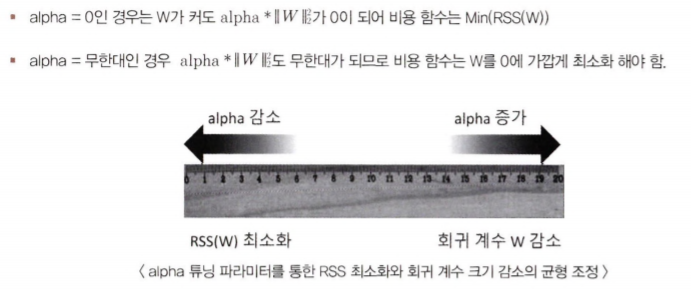
즉, alpha를 0에서부터 지속적으로 값을 증가시키면 회귀 계수 값의 크기를 감소시킬 수 있다

이처럼 비용 함수에 alpha 값으로 페널티를 부여해 회귀 계수 값의 크기를 감소시켜 과적합을 개선하는
방식을 규제(Regularization)라고 부른다. 규제는 크게 L2 방식과 L1 방식으로 구분됩니다. 
* L2 규제는 위에서 설명한 바와 같이 alpha * IIW||와 같이 W의 제곱에 대해 페널티를 부여하는 방식. 
*  L1 규제는 alpha * IIW||와 같이 W의 절댓값에 대해 페널티를 부여.L1 규제를 적용하면 영향력이 크지 않은 회귀 계수 값을 0으로 변환
* L2 규제를 적용한 회귀를 릿지(Ridge) 회귀. 
* 라쏘(Lasso) 회귀는 L1 규제를 적용한 회귀

***릿지회귀***

사이킷런은 Ridge 클래스를 통해 릿지 회귀를 구현. Ridge 클래스의 주요 생성 파라미터는 alpha이며. 이는 릿지 회귀의 alpha L2 규제 계수에 해당한다.

In [26]:
## Regularized Linear Model - Ridge Regression¶

# 앞의 LinearRegression예제에서 분할한 feature 데이터 셋인 X_data과 Target 데이터 셋인 Y_target 데이터셋을 그대로 이용 
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# boston 데이타셋 로드
boston = load_boston()

# boston 데이타셋 DataFrame 변환 
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함. 
bostonDF['PRICE'] = boston.target
print('Boston 데이타셋 크기 :',bostonDF.shape)

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)


ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))


Boston 데이타셋 크기 : (506, 14)
 5 folds 의 개별 Negative MSE scores:  [-11.422 -24.294 -28.144 -74.599 -28.517]
 5 folds 의 개별 RMSE scores :  [3.38  4.929 5.305 8.637 5.34 ]
 5 folds 의 평균 RMSE : 5.518 


In [27]:
## alpha값을 0 , 0.1 , 1 , 10 , 100 으로 변경하면서 RMSE 측정

# Ridge에 사용될 alpha 파라미터의 값들을 정의
alphas = [0 , 0.1 , 1 , 10 , 100]

# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse 구함.
for alpha in alphas :
    ridge = Ridge(alpha = alpha)
    
    #cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(alpha,avg_rmse))


alpha 0 일 때 5 folds 의 평균 RMSE : 5.829 
alpha 0.1 일 때 5 folds 의 평균 RMSE : 5.788 
alpha 1 일 때 5 folds 의 평균 RMSE : 5.653 
alpha 10 일 때 5 folds 의 평균 RMSE : 5.518 
alpha 100 일 때 5 folds 의 평균 RMSE : 5.330 


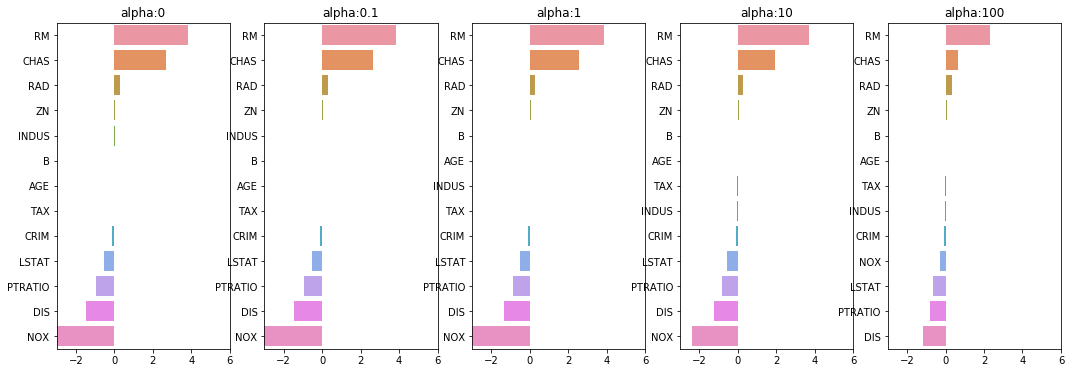

In [28]:
## 각 alpha에 따른 회귀 계수 값을 시각화. 각 alpha값 별로 plt.subplots로 맷플롯립 축 생성

# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성  
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성  
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos , alpha in enumerate(alphas) :
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data , y_target)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.  
    coeff = pd.Series(data=ridge.coef_ , index=X_data.columns )
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()


In [29]:
ridge_alphas = [0 , 0.1 , 1 , 10 , 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

alpha:0  alpha:0.1    alpha:1  alpha:10  alpha:100
RM        3.809865   3.818233   3.854000  3.702272   2.334536
CHAS      2.686734   2.670019   2.552393  1.952021   0.638335
RAD       0.306049   0.303515   0.290142  0.279596   0.315358
ZN        0.046420   0.046572   0.047443  0.049579   0.054496
INDUS     0.020559   0.015999  -0.008805 -0.042962  -0.052826
B         0.009312   0.009368   0.009673  0.010037   0.009393
AGE       0.000692  -0.000269  -0.005415 -0.010707   0.001212
TAX      -0.012335  -0.012421  -0.012912 -0.013993  -0.015856
CRIM     -0.108011  -0.107474  -0.104595 -0.101435  -0.102202
LSTAT    -0.524758  -0.525966  -0.533343 -0.559366  -0.660764
PTRATIO  -0.952747  -0.940759  -0.876074 -0.797945  -0.829218
DIS      -1.475567  -1.459626  -1.372654 -1.248808  -1.153390
NOX     -17.766611 -16.684645 -10.777015 -2.371619  -0.262847

=> alpha 값이 증가하면서 회귀 계수가 지속적으로 작아지고 있음을 알 수 있습니다. 하지만 릿지 회귀의
경우에는 회귀 계수를 0으로 만들지는 않습니다.

---

***라쏘 회귀***

W의 절댓값에 페널티를 부여하는 L1 규제를 선형 회귀에 적용한 것이 라쏘(Lasso) 회귀. 즉 L1
규제는 alpha * IIW||를 의미하며. 라쏘 회귀 비용함수의 목표는 RSS(W)+ alpha * IIIW|| 식을 최소화하는 W를 찾는 것이다. L2 규제가 회귀 계수의 크기를 감소시키는 데 반해, L1 규제는 불필요한
회귀 계수를 급격하게 감소시켜 0으로 만들고 제거한다. 이러한 측면에서 L1 규제는 적절한 피처만
회귀에 포함시키는 피처 선택의 특성을 가지고 있다.

사이킷런은 Lasso 클래스를 통해 라쏘 회귀를 구현. Lasso 클래스의 주요 생성 파라미터는
alpha이며, 이는 라쏘 회귀의 alpha L1 규제 계수에 해당.

In [30]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, 
                        verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, 
                                             y_target_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        
        model.fit(X_data_n , y_target_n)
        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
            coeff = pd.Series(data=model.coef_ , index=X_data_n.columns )
            colname='alpha:'+str(param)
            coeff_df[colname] = coeff
    
    return coeff_df
# end of get_linear_regre_eval

In [31]:
# 라쏘에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df =get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

#######  Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.612 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.615 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.669 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.776 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.189 


In [32]:
print(lasso_alphas)

[0.07, 0.1, 0.5, 1, 3]


In [33]:
# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

alpha:0.07  alpha:0.1  alpha:0.5   alpha:1   alpha:3
RM         3.789725   3.703202   2.498212  0.949811  0.000000
CHAS       1.434343   0.955190   0.000000  0.000000  0.000000
RAD        0.270936   0.274707   0.277451  0.264206  0.061864
ZN         0.049059   0.049211   0.049544  0.049165  0.037231
B          0.010248   0.010249   0.009469  0.008247  0.006510
NOX       -0.000000  -0.000000  -0.000000 -0.000000  0.000000
AGE       -0.011706  -0.010037   0.003604  0.020910  0.042495
TAX       -0.014290  -0.014570  -0.015442 -0.015212 -0.008602
INDUS     -0.042120  -0.036619  -0.005253 -0.000000 -0.000000
CRIM      -0.098193  -0.097894  -0.083289 -0.063437 -0.000000
LSTAT     -0.560431  -0.568769  -0.656290 -0.761115 -0.807679
PTRATIO   -0.765107  -0.770654  -0.758752 -0.722966 -0.265072
DIS       -1.176583  -1.160538  -0.936605 -0.668790 -0.000000

=> alpha의 크기가 증가함에 따라 일부 피처의 회귀 계수는 아예 0으로 바뀌고 있습니다. NOX 속성은
alpha가 0.07일 때부터 회귀 계수가 0이며, alpha를 증가시키면서 INDUS, CHAS와 같은 속성의 회귀 계수가 0으로 바뀝니다. 회귀 계수가 0인 피처는 회귀 식에서 제외되면서 피처 선택의 효과를 얻을 수 있습니다.

---

***엘라스틱넷 회귀***

엘라스틱넷(Elastic Net) 회귀는 L2 규제와 L1 규제를 결합한 회귀. 따라서 엘라스틱넷 회귀 비용함수의 목표는 RSS(W)十 alpha2 * IIW|| + alphal * IIW|| 식을 최소화하는 W를 찾는 것이다. 엘라스틱넷은 라쏘 회귀가 서로 상관관계가 높은 피처들의 경우에 이들 중에서 중요 피처만을 셀렉션하고 다른 피처들은 모두 회귀 계수를 0으로 만드는 성향이 강하다. 특히 이러한 성향으로 인해
alpha값에 따라 회귀 계수의 값이 급격히 변동할 수도 있는데, 엘라스틱넷 회귀는 이를 완화하기 위해
L2 규제를 라쏘 회귀에 추가한 것이다. 반대로 엘라스틱넷 회귀의 단점은 L1과 L2 규제가 결합된 규제로 인해 수행시간이 상대적으로 오래 걸린다는 것이다.

사이킷런은 ElasticNet 클래스를 통해서 엘라스틱넷 회귀를 구현. ElasticNet 클래스의 주요
생성 파라미터는 alpha와 ㅣ1_ratio입니다. ElasticNet 클래스의 alpha는 Ridge와 Lasso 클래스의
alpha값과는 다르다. 엘라스틱넷의 규제는 a * LI + b * L2로 정의될 수 있으며, 이 때 a는 L1 규제
의 alpha값, b는 L2 규제의 alpha 값. 따라서 ElasticNet 클래스의 alpha 파라미터 값은 a + b. ElasticNet 클래스의 ll_ratio 파라미터 값은 a / (a + b). ㅣ1_ratio가 0이면 a가 0이므
로 L2 규제와 동일하고 ㅣ1_ratio가 1 이면 b가 0이므로 L1 규제와 동일하다.


In [34]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
# l1_ratio는 0.7로 고정
elastic_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df =get_linear_reg_eval('ElasticNet', params=elastic_alphas,
                                      X_data_n=X_data, y_target_n=y_target)

#######  ElasticNet #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.542 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.526 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.467 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.597 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.068 


In [35]:
# 반환된 coeff_elastic_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

alpha:0.07  alpha:0.1  alpha:0.5   alpha:1   alpha:3
RM         3.574162   3.414154   1.918419  0.938789  0.000000
CHAS       1.330724   0.979706   0.000000  0.000000  0.000000
RAD        0.278880   0.283443   0.300761  0.289299  0.146846
ZN         0.050107   0.050617   0.052878  0.052136  0.038268
B          0.010122   0.010067   0.009114  0.008320  0.007020
AGE       -0.010116  -0.008276   0.007760  0.020348  0.043446
TAX       -0.014522  -0.014814  -0.016046 -0.016218 -0.011417
INDUS     -0.044855  -0.042719  -0.023252 -0.000000 -0.000000
CRIM      -0.099468  -0.099213  -0.089070 -0.073577 -0.019058
NOX       -0.175072  -0.000000  -0.000000 -0.000000 -0.000000
LSTAT     -0.574822  -0.587702  -0.693861 -0.760457 -0.800368
PTRATIO   -0.779498  -0.784725  -0.790969 -0.738672 -0.423065
DIS       -1.189438  -1.173647  -0.975902 -0.725174 -0.031208

=> alpha 0.5일 때 RMSE가 5.468로 가장 좋은 예측 성능을 보이고 있습니다. alpha값에 따른 피처들의
회귀 계수들 값이 라쏘보다는 상대적으로 0이 되는 값이 적음을 알 수 있습니다.

지금까지 규제 선형 회귀의 가장 대표적인 기법인 릿지, 라쏘, 엘라스틱넷 회귀를 살펴봤습니다. 이들
중 어떤 것이 가장 좋은지는 상황에 따라 다릅니다. 각각의 알고리즘에서 하이퍼 파라미터를 변경해 가면서 최적의 예측 성능을 찾아내야 합니다. 하지만 선형 회귀의 경우 최적의 하이퍼 파라미터를 찾아내는 것 못지않게 먼저 데이터 분포도의 정규화와 인코딩 방법이 매우 중요합니다

***선형 회귀 모델을 위한 데이터 변환***<br>
선형 회귀 모델은 피처값과 타깃값의 분
포가 정규 분포(즉 평균을 중심으로 종 모양으로 데이터 값이 분포된 형태) 형태를 매우 선호. 특히 타깃값의 경우 정규 분포 형태가 아니라 특정값의 분포가 치우친 왜곡(Skew)된 형태의 분포도일 경우 예측 성능에 부정적인 영향을 미칠 가능성이 높다. 피처값 역시 결정값보다는 덜하지만 왜곡된 분포도로 인해 예측 성능에 부정적인 영향을 미칠 수 있다. 따라서 선형 회귀 모델을 적용하기 전에 먼저 데이터에 대한 스케일링/정규화 작업을 수행하는 것이 일반적.

하지만 이러한 스케일링/정규화 작업을 선행한다고 해서 무조건 예측 성능이 향상되는 것은 아니다. 일반적으로 중요 피
처들이나 타깃값의 분포도가 심하게 왜곡됐을 경우에 이러한 변환 작업을 수행.<br>
일반적으로 피처 데이터 세트와 타깃 데이터 세트에 이러한 스케일링/정규화 작업을 수행하는 방법이
조금은 다르다.
* 사이킷런을 이용해 피처 데이터 세트에 적용하는 변환 작업
> 1. StandardScaler 클래스를 이용해 평균이 0, 분산이 1인 표준 정규 분포를 가진 데이터 세트로 변환하거나
MinMaxScaler 클래스를 이용해 최솟값이 0이고 최댓값이 1인 값으로 정규화를 수행합니다.
>2. 스케일링/정규화를 수행한 데이터 세트에 다시 다항 특성을 적용하여 변환하는 방법입니다. 보통 1번 방법을 통해
예측 성능에 향상이 없을 경우 이와 같은 방법을 적용합니다.
>3. 원래 값에 log 함수를 적용하면 보다 정규 분포에 가까운 형태로 값이 분포됩니다. 이러한 변환을 로그 변환(Log
Transformation)이라고 부릅니다. 로그 변환은 매우 유용한 변환이며. 실제로 선형 회귀에서는 앞에서 소개한 1, 2
번 방법보다 로그 변환이 훨씬 많이 사용되는 변환 방법입니다. 왜냐하면 1번 방법의 경우 예측 성능 향상을 크게
기대하기 어려운 경우가 많으며 2번 방법의 경우 피처의 개수가 매우 많을 경우에는 다항 변환으로 생성되는 피처
의 개수가 기하급수로 늘어나서 과적합의 이슈가 발생할 수 있기 때문입니다.

*타깃값의 경우는 일반적으로 로그 변환을 적용*


In [37]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

# method는 표준 정규 분포 변환(Standard), 최대값/최소값 정규화(MinMax), 로그변환(Log) 결정
# p_degree는 다향식 특성을 추가할 때 적용. p_degree는 2이상 부여하지 않음. 
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data

    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, 
                                         include_bias=False).fit_transform(scaled_data)
    
    return scaled_data

In [38]:
# Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환방법에 따른 RMSE 추출. 
alphas = [0.1, 1, 10, 100]
#변환 방법은 모두 6개, 원본 그대로, 표준정규분포, 표준정규분포+다항식 특성
# 최대/최소 정규화, 최대/최소 정규화+다항식 특성, 로그변환 
scale_methods=[(None, None), ('Standard', None), ('Standard', 2), 
               ('MinMax', None), ('MinMax', 2), ('Log', None)]
for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], 
                                    input_data=X_data)
    print(X_data_scaled.shape, X_data.shape)
    print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled, 
                        y_target_n=y_target, verbose=False, return_coeff=False)

(506, 13) (506, 13)

## 변환 유형:None, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.788 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.653 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.518 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.330 
(506, 13) (506, 13)

## 변환 유형:Standard, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.826 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.803 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.637 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.421 
(506, 104) (506, 13)

## 변환 유형:Standard, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 8.827 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 6.871 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.485 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 4.634 
(506, 13) (506, 13)

## 변환 유형:MinMax, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.764 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.465 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.754 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 7.635 
(506, 104) (506, 13)

## 변환 유형:MinMax, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.298 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 4.323 
alpha 10일 때 5 폴드 세트의 평균 RMS

=> 결과를 보면 표준 정규 분포와 최솟값/최댓값 정규화로 피처 데이터 세트를 변경해도 성능상의 개선은
없습니다. 표준 정규 분포로 일차 변환 후 2차 다항식 변환을 했을 때 alpha=100에서 4.631 로 성능이
개선됐으며 최솟값/최댓값 정규화로 일차 변환 후 2차 다항식 변환을 했을 때 alpha=l에서 4.320으로 성능이 개선됐습니다. 하지만 다항식 변환은 앞에서 언급한 단점으로 인해 피처의 개수가 많을 경우 적용하기 힘들며, 또한 데이터 건수가 많아지면 계산에 많은 시간이 소모되어 적용에 한계가 있습니다.
반면에 로그 변환을 보면 alpha가 0.1, 1, 10인 경우에 모두 좋은 성능 향상이 있음을 알 수 있습니다.
일반적으로 선형 회귀를 적용하려는 데이터 세트에 데이터 값의 분포가 심하게 왜곡되어 있을 경우에
이처럼 로그 변환을 적용하는 것이 좋은 결과를 기대할 수 있습니다

### 07. 로지스틱 회귀

로지스틱 회귀는 선형 회귀 방식을 분류에 적용한 알고리즘. 로지스틱 회귀가 선형 회귀와 다른 점은 학습을 통해
선형 함수의 회귀 최적선을 찾는 것이 아니라 시그모이드(Sigmoid) 함수 최적선을 찾고 이 시그모이드 함수의 반환 값을 확률로 간주해 확률에 따라 분류를 결정한다는 것이다.
> 시그모이드 함수 : $y=\frac{1}{1+e^{-x}}$
; y 값은 항상 0과 1 사이 값을 반환

로지스틱 회귀는 선형 회귀 방식을 기반으로 하되 시그모이드 함수를 이용해 분류를 수행하는 회귀

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# StandardScaler( )로 평균이 0, 분산 1로 데이터 분포도 변환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train , X_test, y_train , y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

In [41]:
from sklearn.metrics import accuracy_score, roc_auc_score

# 로지스틱 회귀를 이용하여 학습 및 예측 수행. 
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

# accuracy와 roc_auc 측정
print('accuracy: {:0.3f}'.format(accuracy_score(y_test, lr_preds)))
print('roc_auc: {:0.3f}'.format(roc_auc_score(y_test , lr_preds)))

accuracy: 0.982
roc_auc: 0.979


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [42]:
from sklearn.model_selection import GridSearchCV

params={'penalty':['l2', 'l1'],
        'C':[0.01, 0.1, 1, 1, 5, 10]}

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3 )
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, 
                                                  grid_clf.best_score_))

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

최적 하이퍼 파라미터:{'C': 0.1, 'penalty': 'l2'}, 최적 평균 정확도:0.979


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


로지스틱 회귀는 가볍고 빠르지만. 이진 분류 예측 성능도 뛰어납니다. 이 때문에 로지스틱 회귀를 이진 분류의 기본 모델로 사용하는 경우가 많습니다. 또한 로지스틱 회귀는 희소한 데이터 세트 분류에도
뛰어난 성능을 보여서 텍스트 분류에서도 자주 사용됩니다.


### 08. 회귀 트리

회귀 함수를 기반으로 하지 않고 결정 트리와 같이 트리를 기반으로 하는 회귀 방식. 트리 기반의 회귀는 회귀 트리를 이용하는 것이다. 즉. 회귀를 위한 트리를 생성하고 이를 기반으로
회귀 예측을 하는 것. 회귀 트리는 앞 4장의 분류에서 언급했던 분류 트리와 크게 다르지 않다. 다만 리프 노드에서 예측 결정 값을 만드는 과정에 차이가 있는데. 분류 트리가 특정 클래스 레이블을 결정하는 것과는 달리 회귀 트리는 리프 노드에 속한 데이터 값의 평균값을 구해 회귀 예측값을 계산한다.
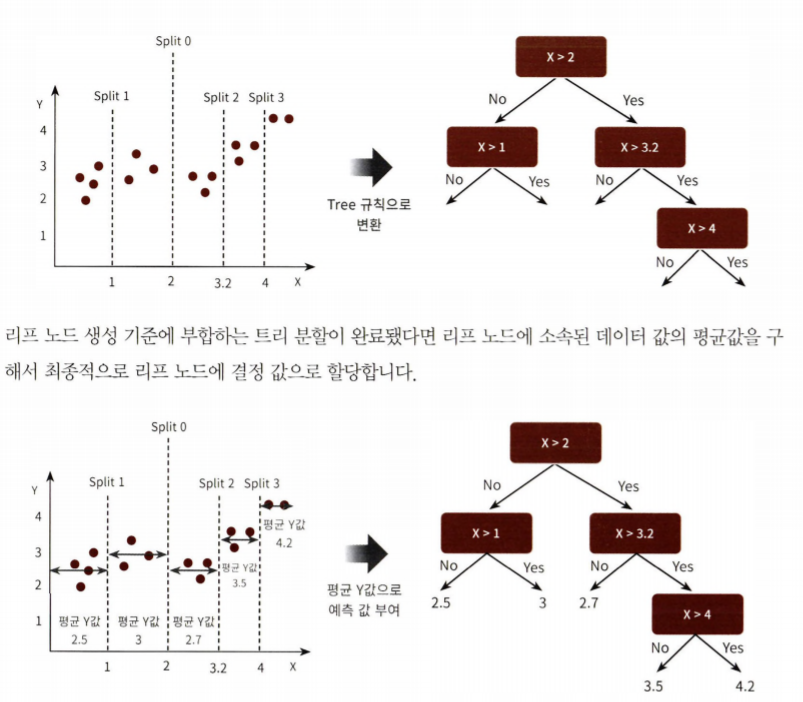

결정 트리. 랜덤 포레스트. GBM. XGBoost, LightGBM 등의 앞 4장의 분류에서 소개한 모든 트리 기반의 알고리즘은 분류뿐만 아니라 회귀도 가능-> 트리 생성이 CART 알고리즘에 기반하고 있기
때문이다. CART(Classification And Regression Trees)는 이름에서도 알 수 있듯이 분류뿐만 아니라 회귀도 가능하게 해주는 트리 생성 알고리즘.<br>
사이킷런에서는 결정 트리, 랜덤 포레스트, GBM에서 CART 기반의 회귀 수행을 할 수 있는 Estimator
클래스를 제공. 또한 XGBoost, LightGBM도 사이킷런 래퍼 클래스를 통해 이를 제공.
다음은 사이킷런의 트리 기반 회귀와 분류의 Estimator 클래스를 표로 나타낸 것
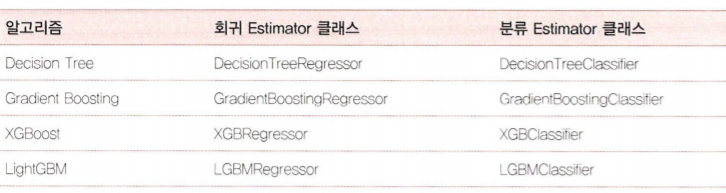

In [43]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

# 보스턴 데이터 세트 로드
boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

bostonDF['PRICE'] = boston.target
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1,inplace=False)

rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 교차 검증의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 교차 검증의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 교차 검증의 개별 Negative MSE scores:  [ -7.93 -13.06 -20.53 -46.31 -18.8 ]
 5 교차 검증의 개별 RMSE scores :  [2.82 3.61 4.53 6.8  4.34]
 5 교차 검증의 평균 RMSE : 4.420 


In [44]:
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    rmse_scores  = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('##### ',model.__class__.__name__ , ' #####')
    print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

In [45]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

# 트리 기반의 회귀 모델을 반복하면서 평가 수행 
models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:  
    get_model_cv_prediction(model, X_data, y_target)

#####  DecisionTreeRegressor  #####
 5 교차 검증의 평균 RMSE : 5.978 
#####  RandomForestRegressor  #####
 5 교차 검증의 평균 RMSE : 4.420 
#####  GradientBoostingRegressor  #####
 5 교차 검증의 평균 RMSE : 4.272 
[03:51:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Administrator\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Administrator\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[03:51:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Administrator\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[03:51:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Administrator\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[03:51:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Administrator\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[03:51:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
#####  XGBRegressor  #####
 5 교차 검증의 평균 RMSE : 4.089 
#####  LGBMRegressor  #####
 5 교차 검증의 평균 RMSE : 4.646 


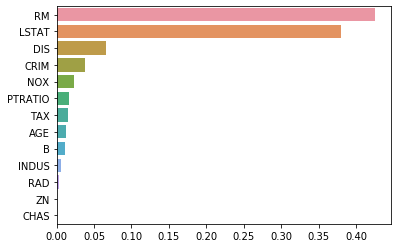

In [46]:
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators=1000)

# 앞 예제에서 만들어진 X_data, y_target 데이터 셋을 적용하여 학습합니다.   
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns )
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x= feature_series, y=feature_series.index)

(100, 2)


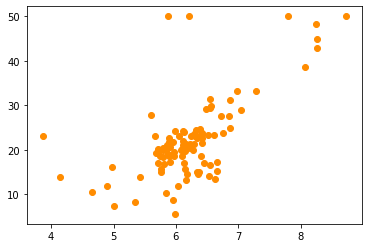

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

bostonDF_sample = bostonDF[['RM','PRICE']]
bostonDF_sample = bostonDF_sample.sample(n=100,random_state=0)
print(bostonDF_sample.shape)
plt.figure()
plt.scatter(bostonDF_sample.RM , bostonDF_sample.PRICE,c="darkorange")

In [48]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 선형 회귀와 결정 트리 기반의 Regressor 생성. DecisionTreeRegressor의 max_depth는 각각 2, 7
lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)

# 실제 예측을 적용할 테스트용 데이터 셋을 4.5 ~ 8.5 까지 100개 데이터 셋 생성. 
X_test = np.arange(4.5, 8.5, 0.04).reshape(-1, 1)

# 보스턴 주택가격 데이터에서 시각화를 위해 피처는 RM만, 그리고 결정 데이터인 PRICE 추출
X_feature = bostonDF_sample['RM'].values.reshape(-1,1)
y_target = bostonDF_sample['PRICE'].values.reshape(-1,1)

# 학습과 예측 수행. 
lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)

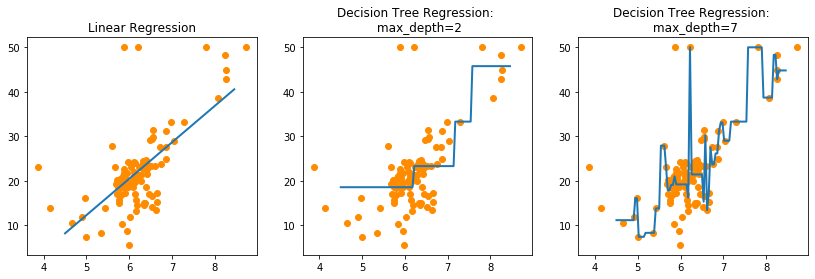

In [49]:
fig , (ax1, ax2, ax3) = plt.subplots(figsize=(14,4), ncols=3)

# X축값을 4.5 ~ 8.5로 변환하며 입력했을 때, 선형 회귀와 결정 트리 회귀 예측 선 시각화
# 선형 회귀로 학습된 모델 회귀 예측선 
ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax1.plot(X_test, pred_lr,label="linear", linewidth=2 )

# DecisionTreeRegressor의 max_depth를 2로 했을 때 회귀 예측선 
ax2.set_title('Decision Tree Regression: \n max_depth=2')
ax2.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax2.plot(X_test, pred_rf2, label="max_depth:3", linewidth=2 )

# DecisionTreeRegressor의 max_depth를 7로 했을 때 회귀 예측선 
ax3.set_title('Decision Tree Regression: \n max_depth=7')
ax3.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax3.plot(X_test, pred_rf7, label="max_depth:7", linewidth=2)

=> 선형 회귀는 직선으로 예측 회귀선을 표현하는 데 반해. 회귀 트리의 경우 분할되는 데이터 지점에 따
라 브랜치를 만들면서 계단 형태로 회귀선을 만듭니다. DecisionTreeRegressor의 max_dep【h=7인
경우에는 학습 데이터 세트의 이상치(outlier) 데이터도 학습하면서 복잡한 계단 형태의 회귀선을 만들
어 과적합이 되기 쉬운 모델이 되었음을 알 수 있습니다.


### 09. 회귀 실습 - 자전거 대여 수요 예측


In [1]:
## 데이터 클렌징 및 가공

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

bike_df = df_train = pd.read_csv("C:\\Users\\Administrator\\Downloads\\bike-sharing-demand\\bike_train.csv",encoding = "cp949", engine = "python")
print(bike_df.shape)
bike_df.head(3)

(10886, 12)


datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32

In [2]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [3]:

# 문자열을 datetime 타입으로 변경. 
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)

# datetime 타입에서 년, 월, 일, 시간 추출
bike_df['year'] = bike_df.datetime.apply(lambda x : x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x : x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x : x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x: x.hour)
bike_df.head(3)

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   

   humidity  windspeed  casual  registered  count  year  month  day  hour  
0        81        0.0       3          13     16  2011      1    1     0  
1        80        0.0       8          32     40  2011      1    1     1  
2        80        0.0       5          27     32  2011      1    1     2

In [4]:
drop_columns = ['datetime','casual','registered']
bike_df.drop(drop_columns, axis=1,inplace=True)

In [5]:
### RMSLE뿐만 아니라 MSE, RMSE까지 한꺼번에 평가하는 함수
from sklearn.metrics import mean_squared_error, mean_absolute_error

# log 값 변환 시 NaN등의 이슈로 log() 가 아닌 log1p() 를 이용하여 RMSLE 계산
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

# 사이킷런의 mean_square_error() 를 이용하여 RMSE 계산
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

# MSE, RMSE, RMSLE 를 모두 계산 
def evaluate_regr(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    # MAE 는 scikit learn의 mean_absolute_error() 로 계산
    mae_val = mean_absolute_error(y,pred)
    print('RMSLE: {0:.3f}, RMSE: {1:.3F}, MAE: {2:.3F}'.format(rmsle_val, rmse_val, mae_val))

=> 위의 rmsle( ) 함수를 만들 때 한 가시 주의해야 할 점이 있습니다. rmsle를 구할 때 넘파이의 log( )
함수를 이용하거나 사이킷런의 mean_squared_log_error()를 이용할 수도 있지만 데이터 값의 크기
에 따라 오버플로/언더플로(overflow/underflow) 오류가 발생하기 쉽습니다. 예를 들어 rmsle( )를
다음과 같이 정의했을 때 쉽게 오류가 발생할 수 있습니다.

따라서 log()보다는 ***loglp()***를 이용하는데, loglp( )의 경우는 1+ log( ) 값으로 log 변환값에 1을
더하므로 이런 문제를 해결해 줍니다. 그리고 10glp()로 변환된 값은 다시 넘파이의 expml( ) 함수
로 쉽게 원래의 스케일로 복원될 수 있습니다.

In [6]:
## 로그 변환, 피처 인코딩, 모델 학습/예측/평가

from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LinearRegression , Ridge , Lasso

y_target = bike_df['count']
X_features = bike_df.drop(['count'],axis=1,inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

evaluate_regr(y_test ,pred)

RMSLE: 1.165, RMSE: 140.900, MAE: 105.924


In [7]:
def get_top_error_data(y_test, pred, n_tops = 5):
    # DataFrame에 컬럼들로 실제 대여횟수(count)와 예측 값을 서로 비교 할 수 있도록 생성. 
    result_df = pd.DataFrame(y_test.values, columns=['real_count'])
    result_df['predicted_count']= np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])
    # 예측값과 실제값이 가장 큰 데이터 순으로 출력. 
    print(result_df.sort_values('diff', ascending=False)[:n_tops])
    
get_top_error_data(y_test,pred,n_tops=5)

      real_count  predicted_count   diff
1618         890            322.0  568.0
3151         798            241.0  557.0
966          884            327.0  557.0
412          745            194.0  551.0
2817         856            310.0  546.0


=> 가장 큰 상위 5위 오류 값은 546〜568로 실제 값을 감안하면 예측 오류가 꽤 큽니다. 회귀에서 이렇게
큰 예측 오류가 발생할 경우 가장 먼저 살펴볼 것은 Target 값의 분포가 왜곡된 형태를 이루고 있는지
확인하는 것입니다. Target 값의 분포는 정규 분포 형태가 가장 좋습니다. 그렇지 않고 왜곡된 경우에
는 회귀 예측 성능이 저하되는 경우가 발생하기 쉽습니다. 판다스 DataFrame의 hist()를 이용해 자전
거 대여 모델의 Target 값인 count 칼럼이 정규 분포를 이루는지 확인해 보겠습니다.


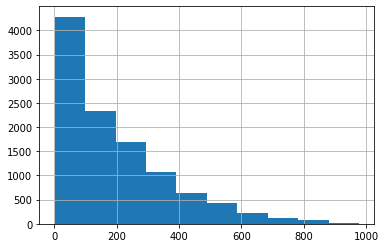

In [8]:
y_target.hist()
#count 칼럼 값이 정규 분포가 아닌 0-200 사이에 왜곡돼 있다

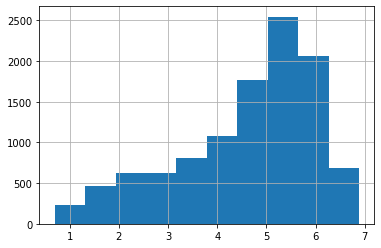

In [9]:
y_log_transform = np.log1p(y_target)
#왜곡된 값을 정규 분포 형태로 바꾸는 가장 일반적인 방법은 로그를 적용해 변환하는 것
y_log_transform.hist()

# 로그로 Target 값을 변환한 후에 원하는 정규 분포 형태는 아니 지만 변환하기 전보다는 왜곡 정도가 많이 향상됨

In [10]:
# 타겟 컬럼인 count 값을 log1p 로 Log 변환
y_target_log = np.log1p(y_target)

# 로그 변환된 y_target_log를 반영하여 학습/테스트 데이터 셋 분할
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size=0.3, random_state=0)
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

# 테스트 데이터 셋의 Target 값은 Log 변환되었으므로 다시 expm1를 이용하여 원래 scale로 변환
y_test_exp = np.expm1(y_test)

# 예측 값 역시 Log 변환된 타겟 기반으로 학습되어 예측되었으므로 다시 exmpl으로 scale변환
pred_exp = np.expm1(pred)

evaluate_regr(y_test_exp ,pred_exp)

RMSLE: 1.017, RMSE: 162.594, MAE: 109.286


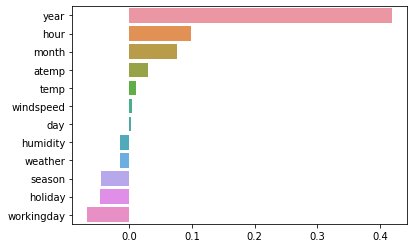

In [11]:
coef = pd.Series(lr_reg.coef_, index=X_features.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [12]:
# 숫자형 카테고리 값을 선형 회귀에 사용할 경우 회귀 계수를 연산할 때 이 숫자형 값에 크게 영향을 받는 경우가 발생할 수 있다. 
#따라서 선형 회귀에서는 이러한 피처 인코딩에 원-핫 인코딩을 적용해 변환해야 함
# 'year', month', 'day', hour'등의 피처들을 One Hot Encoding
X_features_ohe = pd.get_dummies(X_features, columns=['year', 'month','day', 'hour', 'holiday',
                                              'workingday','season','weather'])

In [13]:
# 원-핫 인코딩이 적용된 feature 데이터 세트 기반으로 학습/예측 데이터 분할. 
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target_log,
                                                    test_size=0.3, random_state=0)

# 모델과 학습/테스트 데이터 셋을 입력하면 성능 평가 수치를 반환
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    evaluate_regr(y_test, pred)
# end of function get_model_predict    

# model 별로 평가 수행
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

#성능 평가 수치를 반환 함수
for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model,X_train, X_test, y_train, y_test,is_expm1=True)

### LinearRegression ###
RMSLE: 0.590, RMSE: 97.688, MAE: 63.382
### Ridge ###
RMSLE: 0.590, RMSE: 98.529, MAE: 63.893
### Lasso ###
RMSLE: 0.635, RMSE: 113.219, MAE: 72.803


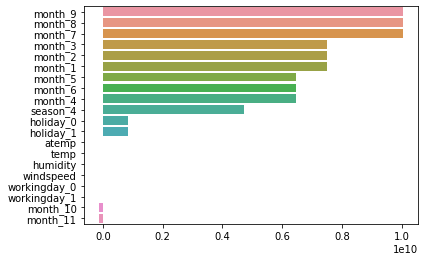

In [14]:
#원-핫 인코딩을 적용하고 나서 선형 회귀의 예측 성능이 많이 향상됨
coef = pd.Series(lr_reg.coef_ , index=X_features_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:20]
sns.barplot(x=coef_sort.values , y=coef_sort.index)

=> 선형 회귀 모델 시 m(mth_9, month_8, m(mth_7등의 월 관련 피처들과 workingclay 관련 피처들,
그리고 hour 관련 피처들의 회귀 계수가 높은 것을 알 수 있습니다. 월, 주말/주중, 그리고 시간대 등
상식선에서 자전거를 타는 데 필요한 피처의 회귀 계수가 높아졌습니다. 이처럼 선형 회귀 수행 시에는
피처를 어떻게 인코딩하는가가 성능에 큰 영향을 미칠 수 있습니다.


In [15]:
# 회귀 트리를 이용해 회귀 예측을 수행
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 랜덤 포레스트, GBM, XGBoost, LightGBM model 별로 평가 수행
rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

for model in [rf_reg, gbm_reg, xgb_reg, lgbm_reg]:
    # XGBoost의 경우 DataFrame이 입력 될 경우 버전에 따라 오류 발생 가능. ndarray로 변환.
    get_model_predict(model,X_train.values, X_test.values, y_train.values, y_test.values,is_expm1=True)

### RandomForestRegressor ###
RMSLE: 0.355, RMSE: 50.143, MAE: 31.136
### GradientBoostingRegressor ###
RMSLE: 0.330, RMSE: 53.342, MAE: 32.741
[16:57:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
### XGBRegressor ###
RMSLE: 0.345, RMSE: 58.245, MAE: 35.768
### LGBMRegressor ###
RMSLE: 0.319, RMSE: 47.215, MAE: 29.029


=> 앞의 선형 회귀 모델보다 회귀 예측 성능이 개선됐습니다. 하지만 이것이 회귀 트리가 선형 회귀보다
더 나은 성능을 가진다는 의미는 아닙니다. 데이터 세트의 유형에 따라 결과는 얼마든지 달라질 수 있
습니다.


### 10. 회귀 실습 - 캐글 주택 가격: 고급 회귀 기법


In [39]:
## 데이터 사전 처리(Preprocessing)

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

house_df_org = pd.read_csv("C:\\Users\\Administrator\\Downloads\\house_train.csv",encoding = "cp949", engine = "python")
house_df = house_df_org.copy()
house_df.head(3)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  

[3 rows x 81 columns]

In [40]:
print('데이터 세트의 Shape:', house_df.shape)
print('\n전체 feature 들의 type \n',house_df.dtypes.value_counts())
isnull_series = house_df.isnull().sum()
print('\nNull 컬럼과 그 건수:\n ', isnull_series[isnull_series > 0].sort_values(ascending=False))

데이터 세트의 Shape: (1460, 81)

전체 feature 들의 type 
 object     43
int64      35
float64     3
dtype: int64

Null 컬럼과 그 건수:
  PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


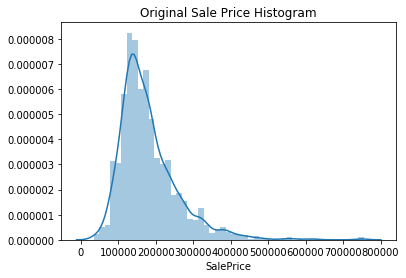

In [41]:
plt.title('Original Sale Price Histogram')
sns.distplot(house_df['SalePrice'])
#  데이터 값의 분포가중심에서 왼쪽으로 치우친 형태로. 정규 분포에서 벗어나 있다.

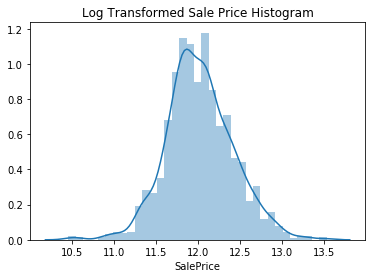

In [42]:
# 정규 분포가 아닌 결괏값을 정규 분포 형태로 변환하기 위해 로그 변환(Log Transformation)을 적용
# loglp()를 이용해 로그 변환한 결괏값을 기반으로 학습한 뒤, 예측 시에는 다시 결괏값을 expml()으로 추후에 환원하면 됩니다
plt.title('Log Transformed Sale Price Histogram')
log_SalePrice = np.log1p(house_df['SalePrice'])
sns.distplot(log_SalePrice)

In [43]:
# SalePrice 로그 변환
original_SalePrice = house_df['SalePrice']
house_df['SalePrice'] = np.log1p(house_df['SalePrice'])

# Null 이 너무 많은 컬럼들과 불필요한 컬럼 삭제
house_df.drop(['Id','PoolQC' , 'MiscFeature', 'Alley', 'Fence','FireplaceQu'], axis=1 , inplace=True)
# Drop 하지 않는 숫자형 Null컬럼들은 평균값으로 대체
house_df.fillna(house_df.mean(),inplace=True)

# Null 값이 있는 피처명과 타입을 추출
null_column_count = house_df.isnull().sum()[house_df.isnull().sum() > 0]
print('## Null 피처의 Type :\n', house_df.dtypes[null_column_count.index])

## Null 피처의 Type :
 MasVnrType      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
dtype: object


In [44]:
#문자형 피처는 모두 원-핫 인코딩으로 변환
print('get_dummies() 수행 전 데이터 Shape:', house_df.shape)
house_df_ohe = pd.get_dummies(house_df)
print('get_dummies() 수행 후 데이터 Shape:', house_df_ohe.shape)

null_column_count = house_df_ohe.isnull().sum()[house_df_ohe.isnull().sum() > 0]
print('## Null 피처의 Type :\n', house_df_ohe.dtypes[null_column_count.index])

get_dummies() 수행 전 데이터 Shape: (1460, 75)
get_dummies() 수행 후 데이터 Shape: (1460, 271)
## Null 피처의 Type :
 Series([], dtype: object)


In [45]:
# 선형 회귀 모델의 학습/예측/평가

#실제 값도 로그 변환됐고. 예측값도 이를 반영한 로그 변환 값이므로 예측 결과 오류에 RMSE만 적용하면 RMSLE가 자동으로 측정됩니다

def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test , pred)
    rmse = np.sqrt(mse)
    print('{0} 로그 변환된 RMSE: {1}'.format(model.__class__.__name__,np.round(rmse, 3)))
    return rmse

def get_rmses(models):
    rmses = [ ]
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [46]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice',axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

# LinearRegression, Ridge, Lasso 학습, 예측, 평가
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE: 0.132
Ridge 로그 변환된 RMSE: 0.128
Lasso 로그 변환된 RMSE: 0.176


[0.13189576579154405, 0.12750846334053045, 0.17628250556471395]

=> 라쏘 회귀의 경우 회귀 성능이 타 회귀 방식보다 많이 떨어지는 결과가 나왔습니다. 라쏘의 경우 최적
하이퍼 파라미터 튜닝이 필요해 보입니다

In [47]:
def get_top_bottom_coef(model):
    # coef_ 속성을 기반으로 Series 객체를 생성. index는 컬럼명. 
    coef = pd.Series(model.coef_, index=X_features.columns)
    
    # + 상위 10개 , - 하위 10개 coefficient 추출하여 반환.
    coef_high = coef.sort_values(ascending=False).head(10)
    coef_low = coef.sort_values(ascending=False).tail(10)
    return coef_high, coef_low

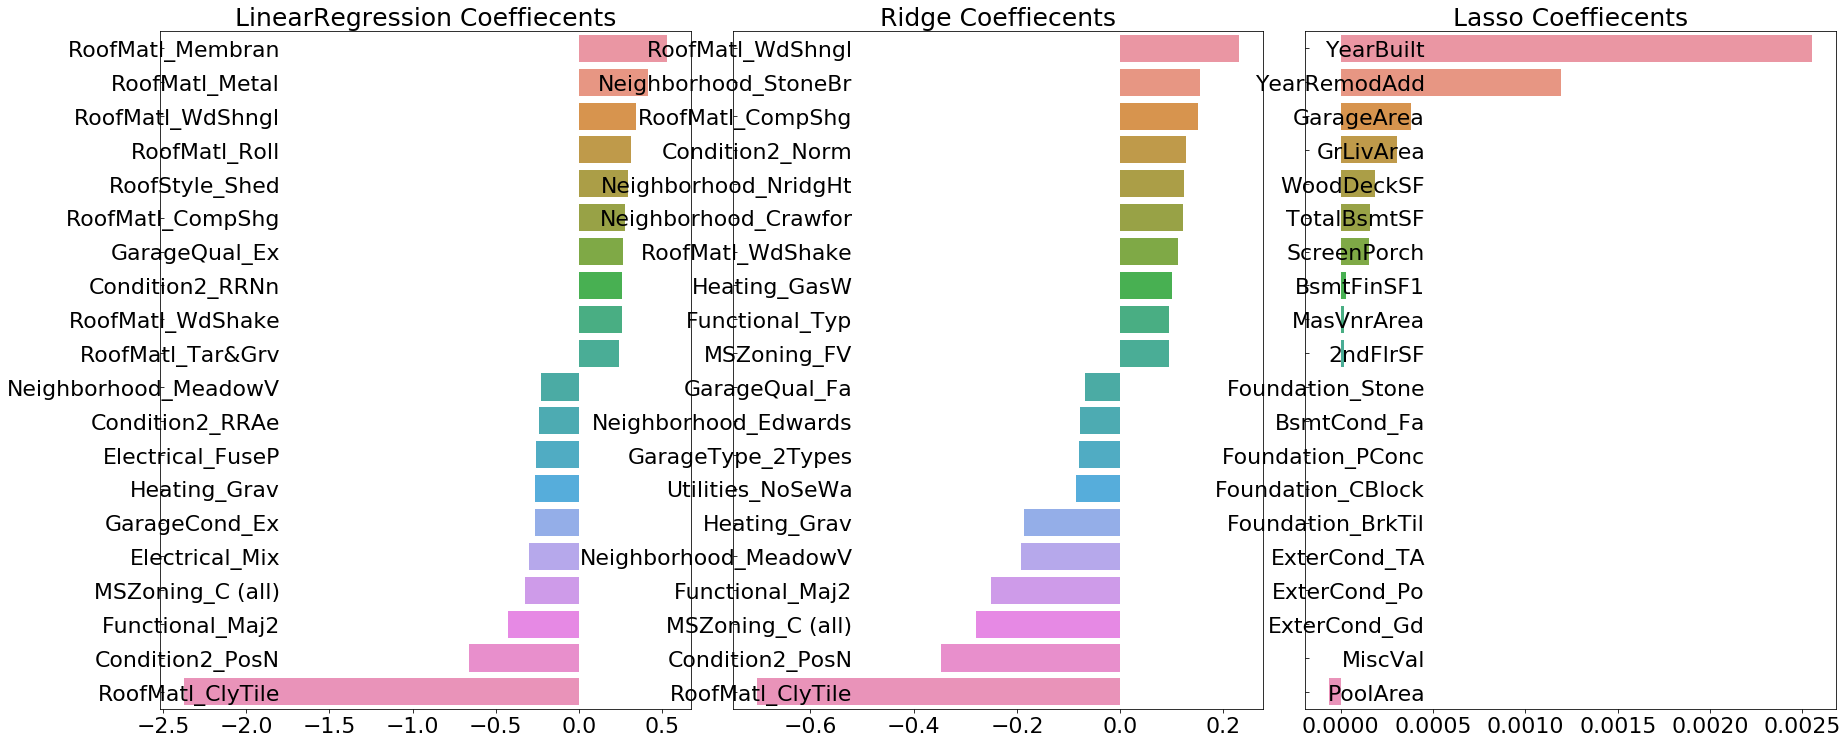

In [48]:
def visualize_coefficient(models):
    # 3개 회귀 모델의 시각화를 위해 3개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=3)
    fig.tight_layout() 
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 회귀 계수 시각화. 
    for i_num, model in enumerate(models):
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합. 
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat( [coef_high , coef_low] )
        # 순차적으로 ax subplot에 barchar로 표현. 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정. 
        axs[i_num].set_title(model.__class__.__name__+' Coeffiecents', size=25)
        axs[i_num].tick_params(axis="y",direction="in", pad=-120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i_num])

# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 회귀 계수 시각화.    
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

=> 모델별 회귀 계수를 보면 OLS기반의 LinearRegression과 Ridge의 경우는 회귀 계수가 유사한 형태로 분포돼 있습니다. 하지만 라쏘(Lasso)는 전체적으로 회귀 계수 값이 매우 작고. 그중에 YearBuilt가 가장 크고 다른 피처의 회귀 계수는 너무 작습니다. 라쏘의 경우 다른 두 개의 모델과 다른 회귀 계
수 형태를 보이고 있습니다. 혹시 학습 데이터의 데이터 분할에 문제가 있어서 그런 것인지. 이번에는
학습과 테스트 데이터 세트를 train_test_split()으로 분할하지 않고 전체 데이터 세트인 X_features와
ytarget을 5개의 교차 검증 폴드 세트로 분할해 평균 RMSE를 측정해 보겠습니다

In [49]:
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):
    for model in models:
        # 분할하지 않고 전체 데이터로 cross_val_score( ) 수행. 모델별 CV RMSE값과 평균 RMSE 출력
        rmse_list = np.sqrt(-cross_val_score(model, X_features, y_target,
                                             scoring="neg_mean_squared_error", cv = 5))
        rmse_avg = np.mean(rmse_list)
        print('\n{0} CV RMSE 값 리스트: {1}'.format( model.__class__.__name__, np.round(rmse_list, 3)))
        print('{0} CV 평균 RMSE 값: {1}'.format( model.__class__.__name__, np.round(rmse_avg, 3)))

# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 CV RMSE값 출력           
models = [lr_reg, ridge_reg, lasso_reg]
get_avg_rmse_cv(models)


LinearRegression CV RMSE 값 리스트: [0.135 0.165 0.168 0.111 0.198]
LinearRegression CV 평균 RMSE 값: 0.155

Ridge CV RMSE 값 리스트: [0.117 0.154 0.142 0.117 0.189]
Ridge CV 평균 RMSE 값: 0.144

Lasso CV RMSE 값 리스트: [0.161 0.204 0.177 0.181 0.265]
Lasso CV 평균 RMSE 값: 0.198


=> 5개의 폴드 세트로 학습한 후 평가해도 여전히 라쏘의 경우가 OLS 모델이나 릿지 모델보다 성능이 떨
어집니다. 릿지와 라쏘 모델에 대해서 alpha 하이퍼 파라미터를 변화시키면서 최적 값을 도출해 보겠
습니다. 

In [50]:
## 하이퍼 파라미터 튜닝

from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params, 
                              scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_features, y_target)
    rmse = np.sqrt(-1* grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                        np.round(rmse, 4), grid_model.best_params_))
    return grid_model.best_estimator_

ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_rige = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.1418, 최적 alpha:{'alpha': 12}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.142, 최적 alpha:{'alpha': 0.001}


LinearRegression 로그 변환된 RMSE: 0.132
Ridge 로그 변환된 RMSE: 0.124
Lasso 로그 변환된 RMSE: 0.12


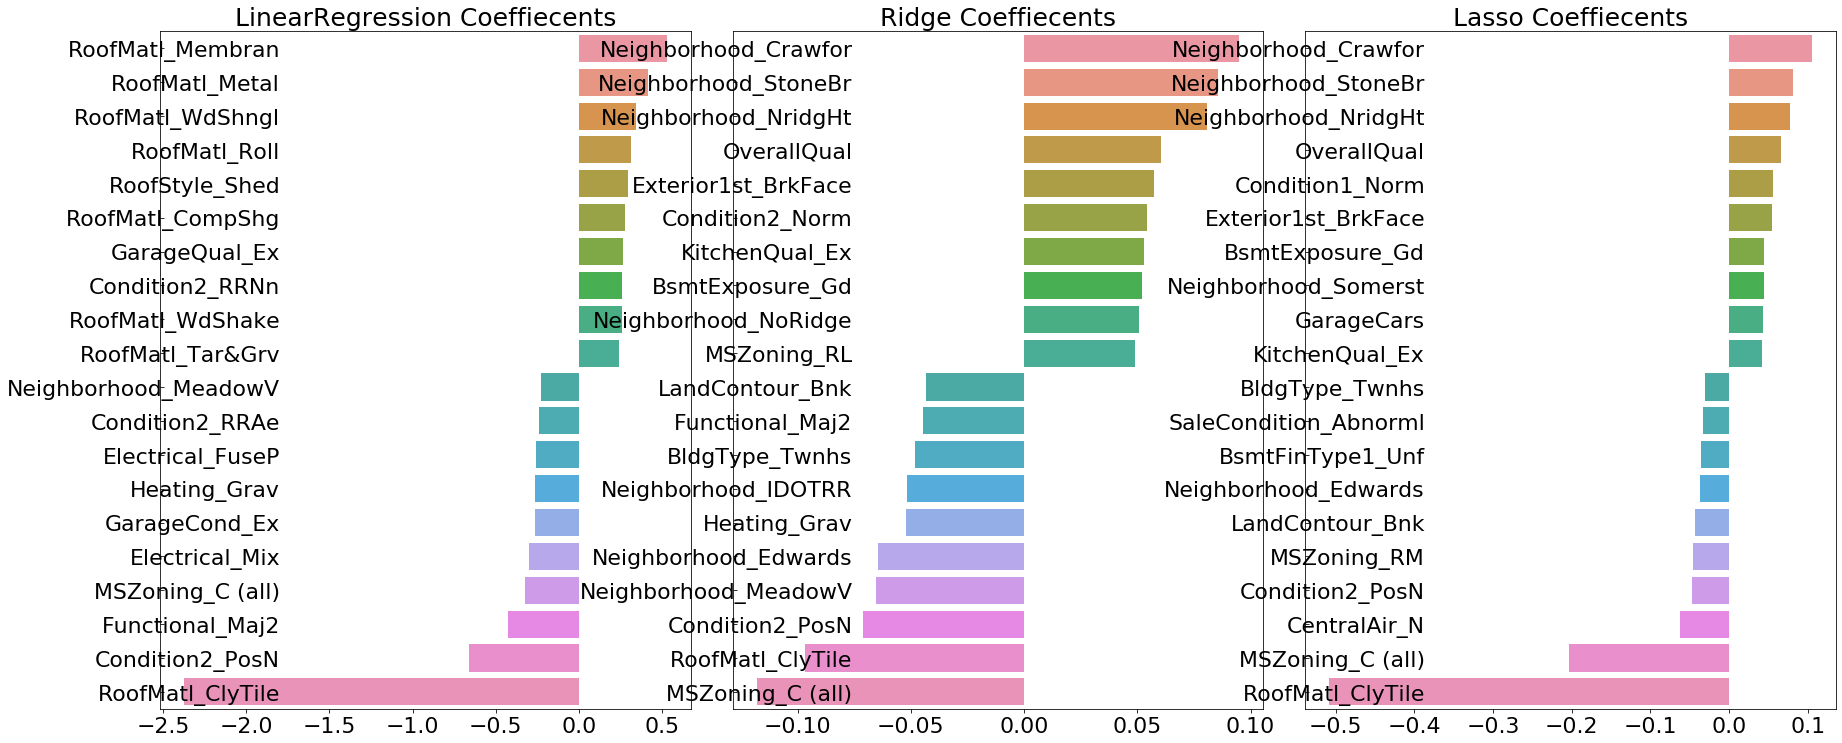

In [51]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행. 
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=12)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화 
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [52]:
## 데이터 왜곡 로그 변환 후 성능 평가

from scipy.stats import skew

# object가 아닌 숫자형 피쳐의 컬럼 index 객체 추출.
features_index = house_df.dtypes[house_df.dtypes != 'object'].index
# house_df에 컬럼 index를 [ ]로 입력하면 해당하는 컬럼 데이터 셋 반환. apply lambda로 skew( )호출 
skew_features = house_df[features_index].apply(lambda x : skew(x))
# skew 정도가 1 이상인 컬럼들만 추출. 
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending=False))

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.673661
LotFrontage       2.382499
OpenPorchSF       2.361912
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
dtype: float64


 skew()를 적용하는 숫자형 피처에서 원-핫 인코딩된 카테고
리 숫자형 피처는 제외해야합니다. 카테고리 피처는 코드성 피처이므로 인코딩 시 당연히 왜곡될 가능성이 높습니다(예를 들어 ‘화장실 여부’가 1로 1000건. 0으로 10건이 될 수 있지만. 이는 왜곡과는 무관합니다). 따라서 skew() 함수를 적용하는 DataFrame은 원-핫 인코딩이 적용된 h()use_clf_()he가
아니라 원—핫 인코딩이 적용되지 않은 house_df이어야 합니다.


In [53]:
house_df[skew_features_top.index] = np.log1p(house_df[skew_features_top.index])
#로그 변환 후 이 피처들의 왜곡 정도를 다시 확인해 보면 여전히 높은 왜곡 정도를 가진 피처가 있지만. 더 이상 로그 변환을 하더라도 개선하기는 어렵기에 그대로 유지

In [54]:
#  Skew가 높은 피처들을 로그 변환 했으므로 다시 원-핫 인코딩 적용 및 피처/타겟 데이터 셋 생성,
house_df_ohe = pd.get_dummies(house_df)
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice',axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

# 피처들을 로그 변환 후 다시 최적 하이퍼 파라미터와 RMSE 출력
ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_ridge = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.1275, 최적 alpha:{'alpha': 10}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.1252, 최적 alpha:{'alpha': 0.001}


=> 릿지 모델의 경우 최적 alpha값이 12에서 10으로 변경됐고, 두 모델 모두 피처의 로그 변환 이전과 비
교해 릿지의 경우 0.1418에서 0.1275로, 라쏘의 경우 0.142에서 0.1252로. 5 폴드 교차 검증의 평균
RMSE값이 향상됐습니다

LinearRegression 로그 변환된 RMSE: 0.128
Ridge 로그 변환된 RMSE: 0.122
Lasso 로그 변환된 RMSE: 0.119


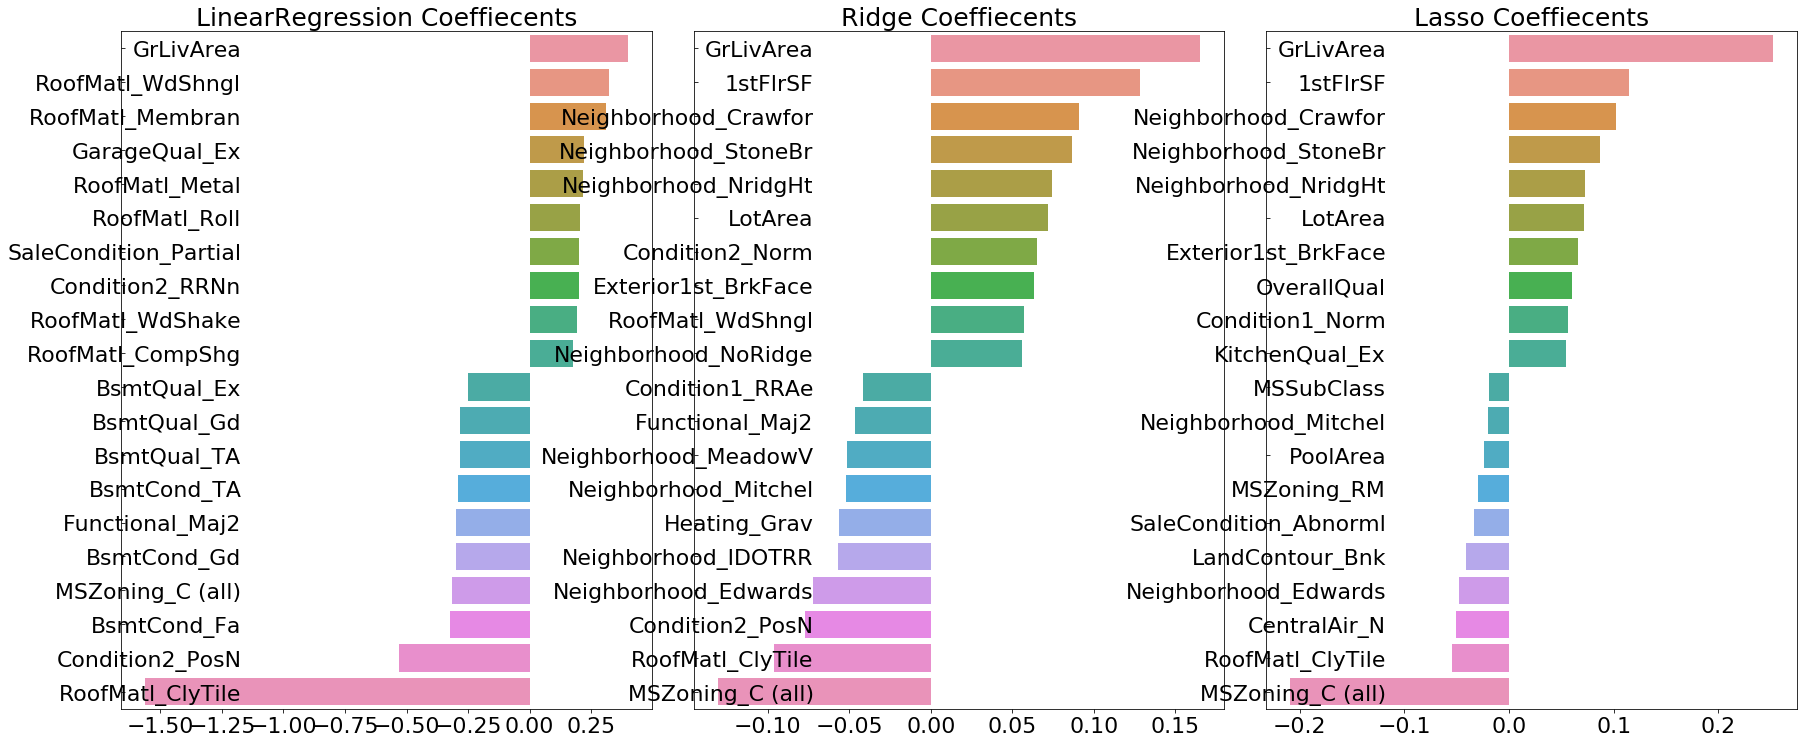

In [55]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행. 
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화 
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

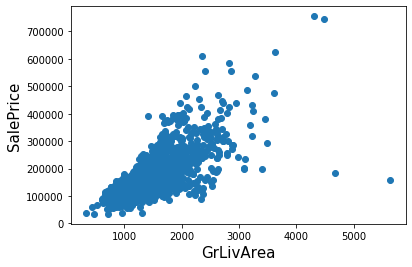

In [56]:
## 이상치 제거

plt.scatter(x = house_df_org['GrLivArea'], y = house_df_org['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('GrLivArea', fontsize=15)
plt.show()

In [57]:
# GrLivArea와 SalePrice 모두 로그 변환되었으므로 이를 반영한 조건 생성. 
cond1 = house_df_ohe['GrLivArea'] > np.log1p(4000)
cond2 = house_df_ohe['SalePrice'] < np.log1p(500000)
outlier_index = house_df_ohe[cond1 & cond2].index

print('아웃라이어 레코드 index :', outlier_index.values)
print('아웃라이어 삭제 전 house_df_ohe shape:', house_df_ohe.shape)
# DataFrame의 index를 이용하여 아웃라이어 레코드 삭제. 
house_df_ohe.drop(outlier_index , axis=0, inplace=True)
print('아웃라이어 삭제 후 house_df_ohe shape:', house_df_ohe.shape)

아웃라이어 레코드 index : [ 523 1298]
아웃라이어 삭제 전 house_df_ohe shape: (1460, 271)
아웃라이어 삭제 후 house_df_ohe shape: (1458, 271)


In [58]:
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice',axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_ridge = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.1125, 최적 alpha:{'alpha': 8}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.1122, 최적 alpha:{'alpha': 0.001}


LinearRegression 로그 변환된 RMSE: 0.129
Ridge 로그 변환된 RMSE: 0.103
Lasso 로그 변환된 RMSE: 0.1


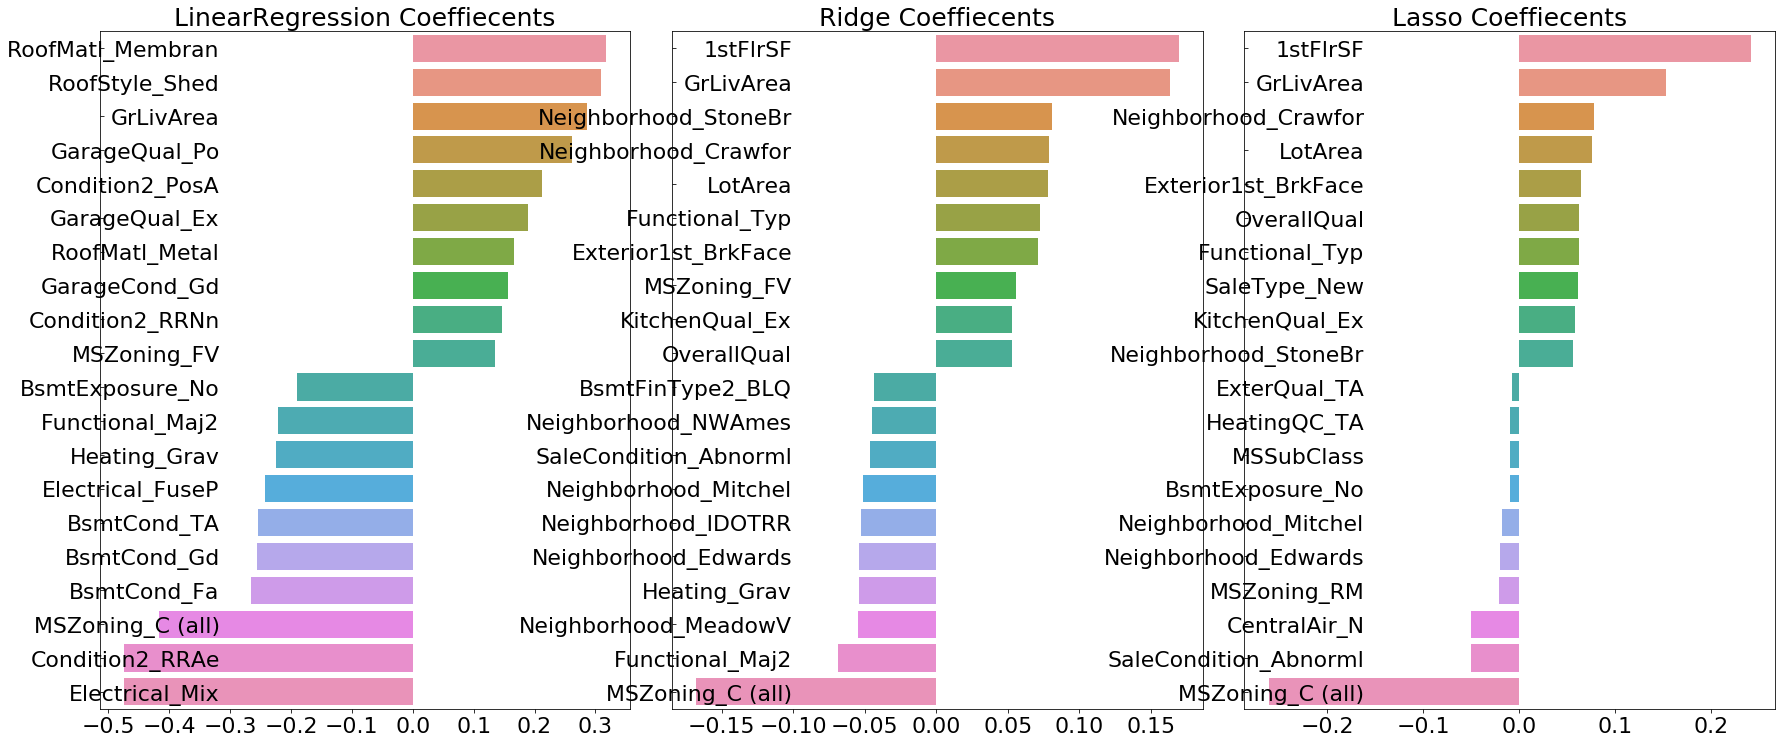

In [59]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행. 
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화 
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [60]:
##회귀 트리 학습/예측/평가

from xgboost import XGBRegressor

xgb_params = {'n_estimators':[1000]}
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8)
best_xgb = print_best_params(xgb_reg, xgb_params)

[17:30:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:30:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:30:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:30:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:30:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:30:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor 5 CV 시 최적 평균 RMSE 값: 0.115, 최적 alpha:{'n_estimators': 1000}


In [61]:
from lightgbm import LGBMRegressor

lgbm_params = {'n_estimators':[1000]}
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
best_lgbm = print_best_params(lgbm_reg, lgbm_params)

LGBMRegressor 5 CV 시 최적 평균 RMSE 값: 0.1165, 최적 alpha:{'n_estimators': 1000}


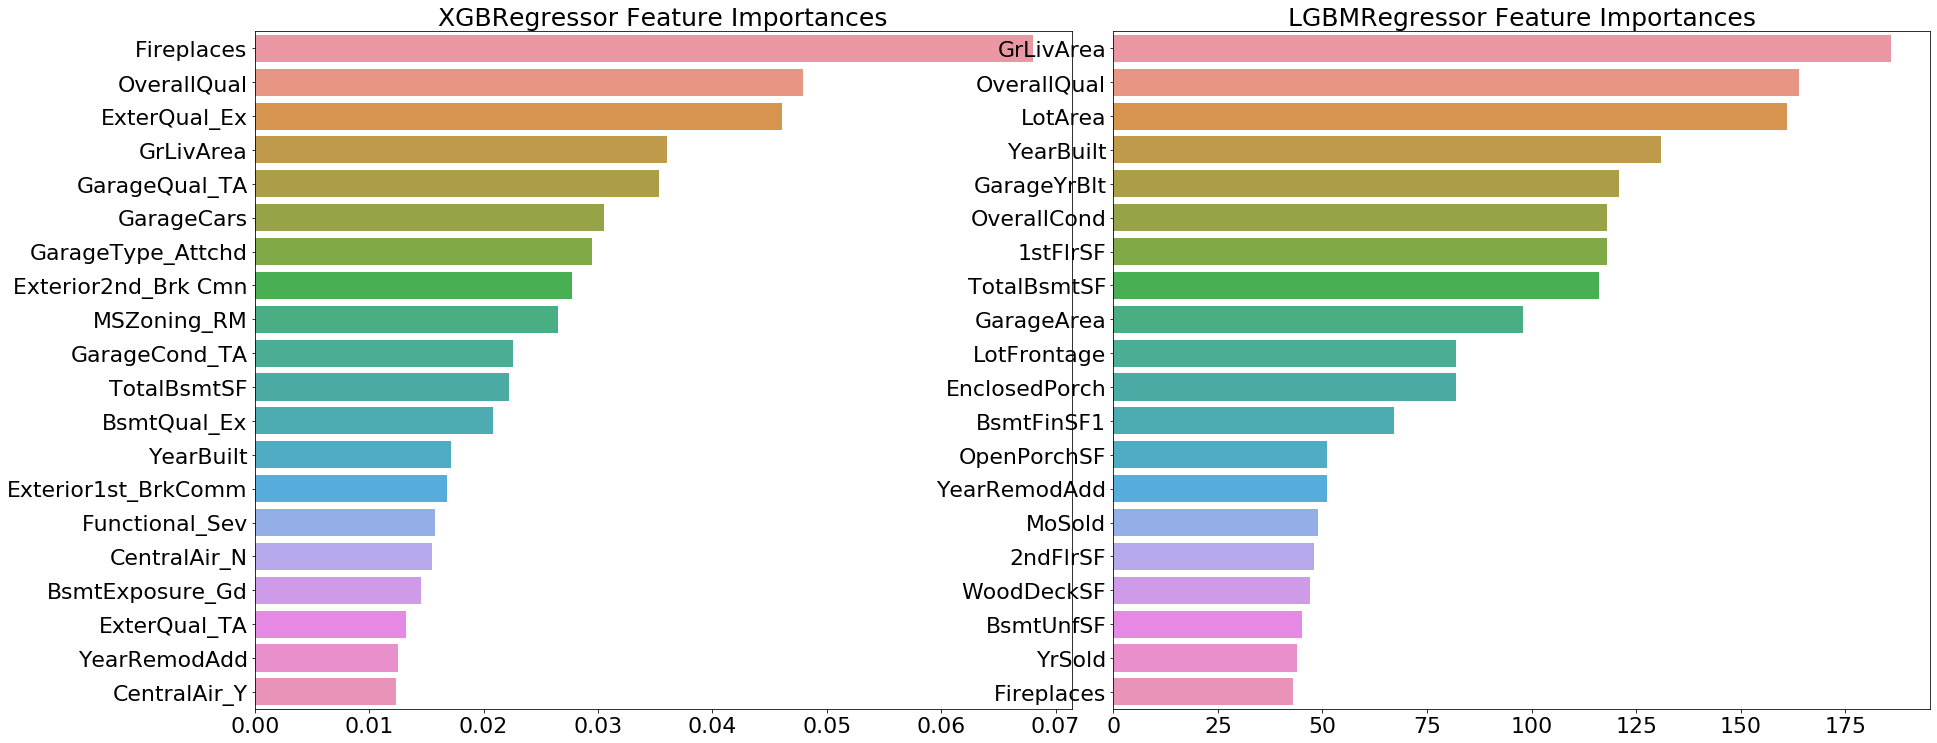

In [62]:
# 모델의 중요도 상위 20개의 피처명과 그때의 중요도값을 Series로 반환.
def get_top_features(model):
    ftr_importances_values = model.feature_importances_
    ftr_importances = pd.Series(ftr_importances_values, index=X_features.columns  )
    ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
    return ftr_top20

def visualize_ftr_importances(models):
    # 2개 회귀 모델의 시각화를 위해 2개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=2)
    fig.tight_layout() 
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 피처 중요도 시각화. 
    for i_num, model in enumerate(models):
        # 중요도 상위 20개의 피처명과 그때의 중요도값 추출 
        ftr_top20 = get_top_features(model)
        axs[i_num].set_title(model.__class__.__name__+' Feature Importances', size=25)
        #font 크기 조정.
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=ftr_top20.values, y=ftr_top20.index , ax=axs[i_num])

# 앞 예제에서 print_best_params( )가 반환한 GridSearchCV로 최적화된 모델의 피처 중요도 시각화    
models = [best_xgb, best_lgbm]
visualize_ftr_importances(models)

In [63]:
## 회귀 모델들의 예측 결과 혼합을 통한 최종 예측

def get_rmse_pred(preds):
    for key in preds.keys():
        pred_value = preds[key]
        mse = mean_squared_error(y_test , pred_value)
        rmse = np.sqrt(mse)
        print('{0} 모델의 RMSE: {1}'.format(key, rmse))

# 개별 모델의 학습
ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)
# 개별 모델 예측
ridge_pred = ridge_reg.predict(X_test)
lasso_pred = lasso_reg.predict(X_test)

# 개별 모델 예측값 혼합으로 최종 예측값 도출
pred = 0.4 * ridge_pred + 0.6 * lasso_pred
preds = {'최종 혼합': pred,
         'Ridge': ridge_pred,
         'Lasso': lasso_pred}
#최종 혼합 모델, 개별모델의 RMSE 값 출력
get_rmse_pred(preds)

최종 혼합 모델의 RMSE: 0.10007930884470519
Ridge 모델의 RMSE: 0.10345177546603272
Lasso 모델의 RMSE: 0.10024170460890039


=> 최종 혼합 모델의 RMSE가 개별 모델보다 성능 면에서 약간 개선됐습니다. 릿지 모델 예측값에 0.4를
곱하고 라쏘 모델 예측값에 0.6을 곱한 뒤 더했습니다. 0.4나 0.6을 정하는 특별한 기준은 없습니다.
두 개 중 성능이 조금 좋은 쪽에 가중치를 약간 더 뒀습니다

In [64]:
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8)
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
xgb_reg.fit(X_train, y_train)
lgbm_reg.fit(X_train, y_train)
xgb_pred = xgb_reg.predict(X_test)
lgbm_pred = lgbm_reg.predict(X_test)

pred = 0.5 * xgb_pred + 0.5 * lgbm_pred
preds = {'최종 혼합': pred,
         'XGBM': xgb_pred,
         'LGBM': lgbm_pred}
        
get_rmse_pred(preds)

[17:33:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
최종 혼합 모델의 RMSE: 0.09897715854093485
XGBM 모델의 RMSE: 0.10075115846547565
LGBM 모델의 RMSE: 0.1015065721553885


***스태킹 앙상블 모델을 통한 회귀 예측***

스태킹 모델은 두 종류의 모델이 필요합니다. 첫 번째는 개별적인 기반 모델이고,
두 번째 이 개별 기반 모델의 예측 데이터를 학습 데이터로 만들어서 학습하는 최종 메타 모델입니다.
스태킹 모델의 핵심은 여러 개별 모델의 예측 데이터를 각각 스태킹 형태로 결합해 최종 메타 모델의
학습용 피처 데이터 세트와 테스트용 피처 데이터 세트를 만드는 것입니다.

최종 메타 모델이 학습할 피처 데이터 세트는 원본 학습 피처 세트로 학습한 개별 모델의 예측값을 스태킹 형태로 결합한 것입니다. 이미 4장에서 소개 했지만, 개별 모델을 스태킹 모델로 제공하기 위해
데이터 세트를 생성하기 위한 get_stacking_base_datasets( ) 함수입니다. 

최종적으로 스태킹 회귀 모델을 적용할 결과, 테스트 데이터 세트에서 RMSE가 약 0.0972로 현재까지
가장 좋은 성능 평가를 보여줍니다. 스태킹 모델은 분류뿐만 아니라 회귀에서 특히 효과적으로 사용될
수 있는 모델입니다.


In [65]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수. 
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    # 지정된 n_folds값으로 KFold 생성.
    kf = KFold(n_splits=n_folds, shuffle=False, random_state=0)
    #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화 
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작 ')
    
    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출 
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n[train_index] 
        y_tr = y_train_n[train_index] 
        X_te = X_train_n[valid_index]  
        #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr , y_tr)       
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장. 
        test_pred[:, folder_counter] = model.predict(X_test_n)
            
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성 
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)    
    
    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean

In [66]:
# get_stacking_base_datasets( )은 넘파이 ndarray를 인자로 사용하므로 DataFrame을 넘파이로 변환. 
X_train_n = X_train.values
X_test_n = X_test.values
y_train_n = y_train.values

# 각 개별 기반(Base)모델이 생성한 학습용/테스트용 데이터 반환. 
ridge_train, ridge_test = get_stacking_base_datasets(ridge_reg, X_train_n, y_train_n, X_test_n, 5)
lasso_train, lasso_test = get_stacking_base_datasets(lasso_reg, X_train_n, y_train_n, X_test_n, 5)
xgb_train, xgb_test = get_stacking_base_datasets(xgb_reg, X_train_n, y_train_n, X_test_n, 5)  
lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm_reg, X_train_n, y_train_n, X_test_n, 5)

Ridge  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
Lasso  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
XGBRegressor  model 시작 
	 폴드 세트:  0  시작 
[17:35:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	 폴드 세트:  1  시작 
[17:35:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	 폴드 세트:  2  시작 
[17:35:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	 폴드 세트:  3  시작 
[17:35:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	 폴드 세트:  4  시작 
[17:36:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
LGBMRegressor  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시

In [68]:
# 개별 모델이 반환한 학습 및 테스트용 데이터 세트를 Stacking 형태로 결합.  
Stack_final_X_train = np.concatenate((ridge_train, lasso_train, 
                                      xgb_train, lgbm_train), axis=1)
Stack_final_X_test = np.concatenate((ridge_test, lasso_test, 
                                     xgb_test, lgbm_test), axis=1)

# 최종 메타 모델은 라쏘 모델을 적용. 
meta_model_lasso = Lasso(alpha=0.0005)

#기반 모델의 예측값을 기반으로 새롭게 만들어진 학습 및 테스트용 데이터로 예측하고 RMSE 측정.
meta_model_lasso.fit(Stack_final_X_train, y_train)
final = meta_model_lasso.predict(Stack_final_X_test)
mse = mean_squared_error(y_test , final)
rmse = np.sqrt(mse)
print('스태킹 회귀 모델의 최종 RMSE 값은:', rmse)

스태킹 회귀 모델의 최종 RMSE 값은: 0.09738961783055027


=> 최종적으로 스태킹 회귀 모델을 적용할 결과, 테스트 데이터 세트에서 RMSE가 약 0.0972로 현재까지
가장 좋은 성능 평가를 보여줍니다. 스태킹 모델은 분류뿐만 아니라 회귀에서 특히 효과적으로 사용될
수 있는 모델입니다.


### 11. 정리

* 선형 회귀는 실제값과 예측값의 차이인 오류를 최소로 줄일 수 있는 선형 함수를 찾아서 이 선형 함수에 독립변수（피처）를 입력해 종속변수（타깃값. 예측값）를 예측하는 것입니다. 
* 이 최적의 선형 함수를 찾기 위해 실제값과 예측값 차이의 제곱을 회귀 계수 W를 변수로 하는 비용 함수로 만들고, 이 비용 함수가 최소화되는 W의 값을 찾아 선형 함수를 도출할 수 있었습니다. 
* 그리고 이 비용 함수를 최소화할 수 있는 방법으로 경사 하강법을 소개했습니다. 
>이러한 비용 함수의 최적화 기법은 머신러닝 전반에 걸쳐서 매우 중요한 개념의 하나입니다.
실제값과 예측값의 차이를 최소화하는 것에만 초점을 맞춘 단순 선형 회귀는 학습 데이터에 과적합되는 문제를 수반할 가능성이 높습니다. 
* 이러한 과적합 문제를 해결하기 위해 규제（Regularization）를 선형 회귀에 도입했습니다.
* 대표적인 규제 선형 회귀는 L2 규제를 적용한 릿지, L1 규제를 적용한 라쏘, 그리고 L1에 L2 규제를 결합한 엘라스틱넷으로 나누어 집니다. 
>일반적으로 선형 회귀는 이들 규제 선형 회귀를 많이 사용합니다.
* 선형 회귀를 분류에 적용한 대표적인 모델이 바로 로지스틱 회귀입니다. 로지스틱 회귀는 이름은 회귀이지만 실제로는 분류를 위한 알고리즘입니다. 
> 선형 함수 대신 최적의 시그모이드 함수를 도출하고. 독립변수（피처）를 이 시그모이드 함수에 입력해 반환된 결과를 확률값으로 변환해 예측 레이블을 결정합니다. 로지스틱 회귀는 매우 뛰어난 분류 알고리즘이며, 특히 이진 분류나 희소 행렬로 표현되는 텍스
트 기반의 분류에서 높은 예측 성능을 나타냅니다.
* 선형（또는 비선형） 회귀와 같이 최적의 선형（또는 비선형） 함수를 찾아내는 대신 회귀 트리를 이용해 예측하는 방법도 있습니다. 
> 회귀 트리는 분류를 위해 만들어진 분류 트리와 크게 다르지 않으나. 리프
노드에서 예측 결정 값을 만드는 과정에 차이가 있습니다. 
> * 회귀 트리는 리프 노드에 속한 데이터 값의 평균값을 구해 회귀 예측값을 계산합니다. 결정 트리, 랜덤 포레스트. GBM, XGBoost, LightGBM 모두 회귀 트리를 이용해 회귀를 수행하는 방법을 제공합니다.

* 선형 모델을 기반으로 하는 선형 회귀는 데이터 값의 분포도와 인코딩 방법에 많은 영향을 받을 수 있습니다. 
>선형 회귀는 데이터 값의 분포도가 정규 분포와 같이 종 모양의 형태를 선호하며, 특히 타깃값의 분포도가 왜곡（Skew）되지 않고 정규 분포 형태로 되어야 예측 성능을 저하시키지 않습니다. 데이터 세트가 이러한 왜곡된 데이터 분포도를 가지고 있을 때 일반적으로 로그 변환을 적용하는 것이 유용
합니다. 또한 선형 회귀의 경우 데이터 세트에 카테고리형 데이터가 있을 경우 이를 레이블 인코딩을 통한 숫자형 변환보다는 원-핫 인코딩으로 변환해줘야 합니다. 회귀 트리의 경우 인코딩 방식에 크게 영향을 받지는 않습니다.
